# Liquidity Profile Analysis

*Estimate the liquidity profile of Euro Area large banks by using regulatory indicators.*

In [ ]:
# load packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
import missingno as msno
from pylab import rcParams
from scipy import stats
import statistics


The dataset is downloaded from the **BankFocus** database.

In [ ]:
# load dataset
data_object = pd.read_excel('Case_Study_3_Dataset_2.xlsx', sheet_name = 'Results2')
data_euro_area21_22 = pd.read_excel('Net_Stable_Funding_EuroArea.xlsx')
lcr_euro_area = pd.read_excel('LCR_ratio_euro_area.xlsx')
gsib_df = pd.read_excel('GSIB_22_21.xlsx')

In [ ]:
data_object = data_object.replace('n.a.', np.nan)

# view dataset
data_object.head()

Company name Latin alphabet  Country Consolidation code  \
0                 BNP PARIBAS   France                 C2   
1          CREDIT AGRICOLE SA   France                 C2   
2          BANCO SANTANDER SA    Spain                 C2   
3            SOCIETE GENERALE   France                 C2   
4            DEUTSCHE BANK AG  Germany                 C2   

   Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2022  \
0                                             115.05               
1                                             114.20               
2                                             121.00               
3                                             113.60               
4                                             120.00               

   Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2021  \
0                                             121.58               
1                                             122.48               
2                                             126.00               
3                                                NaN               
4                                             121.00               

   Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2020  \
0                                                NaN               
1                                                NaN               
2                                              120.0               
3                                                NaN               
4                                                NaN               

   Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2019  \
0                                                NaN               
1                                                NaN               
2                                              112.0               
3                                                NaN               
4                                                NaN               

   Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2018  \
0                                                NaN               
1                                                NaN               
2                                              114.0               
3                                                NaN               
4                                                NaN               

   Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2022  \
0                                              129.0              
1                                              162.7              
2                                              152.0              
3                                              141.0              
4                                              141.6              

   Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2021  \
0                                              143.0              
1                                              183.0              
2                                              163.0              
3                                              129.0              
4                                              133.1              

   Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2020  \
0                                              154.0              
1                                                NaN              
2                                              168.0              
3                                              149.0              
4                                              144.8              

   Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2019  \
0                                              125.0              
1                                              131.6              
2                                              147.0              
3                                              119.0              
4                                             

In order to better visualize the data, we decide to *change* the column names of each dataset, according to their meaning:

In [ ]:
# dataframe
data_object_pd = pd.DataFrame(data_object)

# rename columns
data_object_pd.rename(columns = {'Company name Latin alphabet':'Company',
                                 'Consolidation code':'C_code',
                                 'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2022':'NSFR_22',
                                 'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2021':'NSFR_21',
                                 'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2020':'NSFR_20',
                                 'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2019':'NSFR_19',
                                 'Basel III Net Stable Funding Ratio (NSFR) (as reported)\n2018':'NSFR_18',
                                 'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2022':'LCR_22',
                                 'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2021':'LCR_21',
                                 'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2020':'LCR_20',
                                 'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2019':'LCR_19',
                                 'Basel III Liquidity Coverage Ratio (LCR) (as reported)\n2018':'LCR_18',
                                 'Total assets\nm EUR 2022':'TotAss_22',
                                 'Total assets\nm EUR 2021':'TotAss_21',
                                 'Total assets\nm EUR 2020':'TotAss_20',
                                 'Total assets\nm EUR 2019':'TotAss_19',
                                 'Total assets\nm EUR 2018':'TotAss_18',
                                 }, inplace = True)

In [ ]:
# describe dataset
data_object.describe()

NSFR_22     NSFR_21     NSFR_20     NSFR_19     NSFR_18      LCR_22  \
count   82.000000   81.000000   45.000000   40.000000   32.000000   87.000000   
mean   130.123733  133.772377  130.275333  120.767000  122.751563  185.792701   
std     31.232837   27.688926   14.264800   14.275362   11.877883   90.327448   
min    102.000000  104.600000  105.150000   79.000000  100.000000  107.600000   
25%    112.775000  116.253700  121.020000  112.000000  114.000000  141.050000   
50%    126.500000  130.000000  128.600000  121.700000  121.050000  161.000000   
75%    136.510000  142.493000  139.700000  130.625000  131.087500  199.000000   
max    352.760000  325.250000  173.000000  156.000000  148.900000  786.990000   

           LCR_21      LCR_20       LCR_19      LCR_18     TotAss_22  \
count   85.000000   85.000000    77.000000   72.000000  1.090000e+02   
mean   217.083882  209.460588   187.394961  170.728333  2.972693e+05   
std    130.241313  125.352809   197.039794   77.265433  4.420492e+05   
min    107.000000  105.000000    97.000000   62.000000  3.004862e+04   
25%    158.000000  150.000000   131.600000  128.750000  6.042400e+04   
50%    182.000000  171.000000   148.000000  147.000000  1.075070e+05   
75%    221.410000  211.000000   173.300000  185.250000  3.241740e+05   
max    949.000000  885.960000  1804.000000  519.000000  2.666376e+06   

          TotAss_21     TotAss_20     TotAss_19     TotAss_18  
count  1.090000e+02  1.090000e+02  1.090000e+02  1.090000e+02  
mean   2.929086e+05  2.799903e+05  2.481734e+05  2.388391e+05  
std    4.348612e+05  4.170647e+05  3.748148e+05  3.602081e+05  
min    2.774100e+04  2.530242e+04  2.259691e+04  2.130456e+04  
25%    5.840200e+04  5.361706e+04  4.771200e+04  4.598360e+04  
50%    1.040101e+05  9.431600e+04  8.375440e+04  8.046200e+04  
75%    3.123040e+05  3.207430e+05  2.566300e+05  2.452010e+05  
max    2.634444e+06  2.488491e+06  2.164713e+06  2.040836e+06

The majority of *data_object* dataset consists of continuous attributes (about 83.33%), representing the annual liquidity ratios and the total assets collected from 2018 to 2022. The remaining features (about 16.67%) refer to:
*   ***Company*** name in Latin alphabet;
*   ***Country*** in the Euro Area, where company is domiciled;
*   ***Consolidation code***, the attribute used to group similar object levels into categories for reporting.

Since we need to estimate the liquidity profile of Euro Area ***large*** *banks*, we notice that the banks presenting the consolidated accounts with an unconsolidated companion, show the *greatest* results in the ***size*** assessment. For this reason, we decide to filter our data by considering the **C2** Consolidation Code.

Let's now perform the ***missing*** *values* analysis in order to evaluate whether our sample can be considered as a good *representation* of the population:

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
percent_missing = data_object.isnull().sum() * 100 / len(data_object)
print(percent_missing)

Company       0.000000
Country       0.000000
C_code        0.000000
NSFR_22      24.770642
NSFR_21      25.688073
NSFR_20      58.715596
NSFR_19      63.302752
NSFR_18      70.642202
LCR_22       20.183486
LCR_21       22.018349
LCR_20       22.018349
LCR_19       29.357798
LCR_18       33.944954
TotAss_22     0.000000
TotAss_21     0.000000
TotAss_20     0.000000
TotAss_19     0.000000
TotAss_18     0.000000
dtype: float64


In [ ]:
percent_missing_table = missing_values_table(data_object)
percent_missing_table

Your selected dataframe has 18 columns.
There are 10 columns that have missing values.


Missing Values  % of Total Values
NSFR_18              77               70.6
NSFR_19              69               63.3
NSFR_20              64               58.7
LCR_18               37               33.9
LCR_19               32               29.4
NSFR_21              28               25.7
NSFR_22              27               24.8
LCR_21               24               22.0
LCR_20               24               22.0
LCR_22               22               20.2

Inspecting the results, we can notice that the features that contain ***most*** of the missing observations are: NSFR_18 (*70.6%*), NSFR_19 (*63.3%*) and NSFR_20 (*58.7%*). Then, we have the LCR_18 (*33.9%*), LCR_19 (*29.4%*), NSFR_21 (*25.7%*), NSFR_22 (*24.8%*), LCR_21 (*22.0%*), LCR_20 (*22.0%*) and LCR_22 (*20.2%*). The remaining variables do *not* have any missing values.

Text(-0.03, -0.2, 'Source of the data: BankFocus')

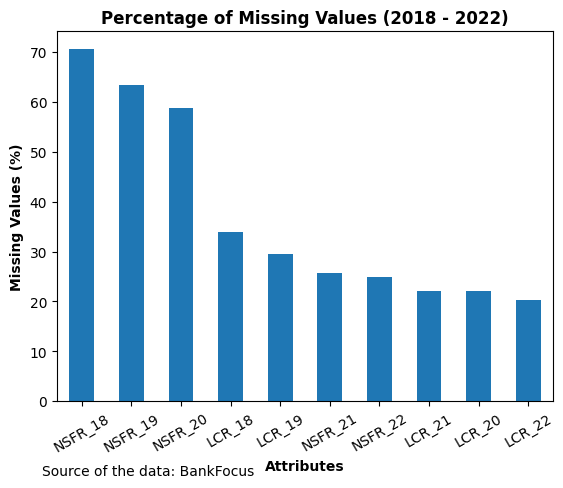

In [ ]:
pl = percent_missing_table['% of Total Values'].plot(kind = 'bar', rot = 30)
pl.set_title('Percentage of Missing Values (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Attributes', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Missing Values (%)', fontweight = 'bold', fontsize = 10)
pl.text(-0.03, -0.2, 'Source of the data: BankFocus', transform = pl.transAxes)

Considering the time frame *2018 - 2020*, Liquidity Coverage Ratio and Net Stable Funding Ratio have a huge percentage of missing values.

In fact, although the implementation of a binding NSFR was originally planned for the 1st of January 2018, it was pushed back in connection with the overhaul of the EU banking packege, and the binding NSFR became effective only in **July 2021**, two years after the Capital Requirements Regulation (CRR) comes into force.

# **1. NSFR**

Let's start considering the Net Stable Funding Ratio.

The **NSFR** establishes a minimum acceptable amount of *medium-long* term funding in front of the banks' assets and activities. It aims to *limit* over-reliance on short-term wholesale funding during times of buoyant market liquidity and encourage better *assessment* of liquidity risk across all on- and off-balance sheet items.

The ratio is given by the ***available*** amount of stable funding over the ***required*** amount of stable funding, that has to be *greater* than ***100%***.

The *stable funding* is defined as the portion of equity capital and liability financing that is expected to be a *reliable* source of funds over a ***1-year*** time horizon.

In [ ]:
nsfr = data_object[['Company', 'Country', 'NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22',
                    'TotAss_18', 'TotAss_19', 'TotAss_20', 'TotAss_21', 'TotAss_22']]
nsfr.shape

(109, 12)

In [ ]:
nsfr_only = nsfr[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]

In [ ]:
# drop rows with NaN
nsfr_df = nsfr.dropna(axis = 'rows')
nsfr_df.shape

(28, 12)

Text(-0.03, -0.2, 'Source of the data: BankFocus')

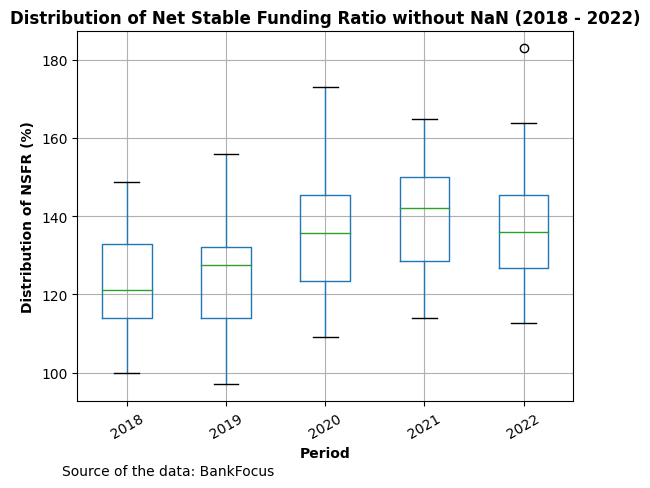

In [ ]:
nsfr_only_df = nsfr_df[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
#nsfr_only_df

bp = nsfr_only_df.boxplot(rot = 30)
nobs = nsfr[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']].count()
nobs = [str(x) for x in nobs.tolist()]
nobs = [f'NSFR_{18+i} n:{nobs[i]}' for i in range(len(nobs))]
bp.set_title('Distribution of Net Stable Funding Ratio without NaN (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('Distribution of NSFR (%)', fontweight = 'bold', fontsize = 10)
bp.text(-0.03, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

In [ ]:
# threshold > 100%
nsfr_100 = nsfr[(nsfr['NSFR_22'] > 100) & (nsfr['NSFR_21'] > 100) & (nsfr['NSFR_20'] > 100) & (nsfr['NSFR_19'] > 100) & (nsfr['NSFR_18'] > 100)]

# drop rows with NaN
nsfr100_df = nsfr_100.dropna(axis = 'rows')

nsfr100_df.shape

(27, 12)

## *1.1. SIZE*

We decided to separate the banks into 4 quartiles according to their total assets so as to see the behvaior of each quartile in terms of liquidity. In this part we analyse each quartile's behavior in terms of net stable funding ratio.

In [ ]:
quartiles = data_object['TotAss_18'].quantile([.25, .5, .75]).tolist()
print(quartiles)

[45983.602, 80462.0, 245200.953]


In [ ]:
Quart1 = data_object[(data_object['TotAss_18'] <= 45983.602)]
Quart2 = data_object[(data_object['TotAss_18'] > 45983.602) & (data_object['TotAss_18'] <= 80462.0)]
Quart3 = data_object[(data_object['TotAss_18'] > 80462.0) & (data_object['TotAss_18'] <= 245200.953)]
Quart4 = data_object[(data_object['TotAss_18'] > 245200.953)]

Text(-0.02, -0.2, 'Source of the data: BankFocus')

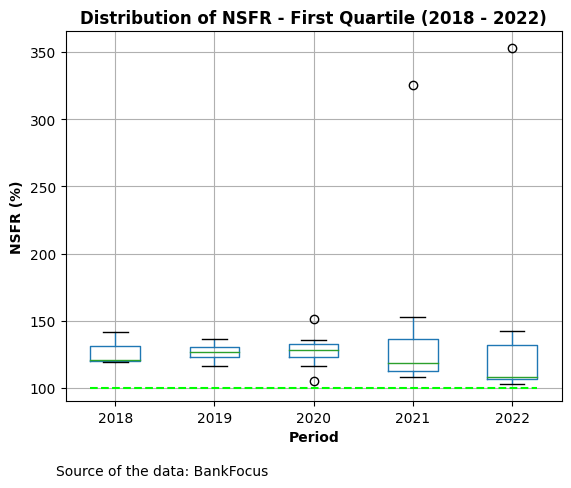

In [ ]:
bp = Quart1[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']].boxplot(fontsize=10)
bp.set_title('Distribution of NSFR - First Quartile (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
bp.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
bp.text(-0.02, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

Text(-0.03, -0.2, 'Source of the data: BankFocus')

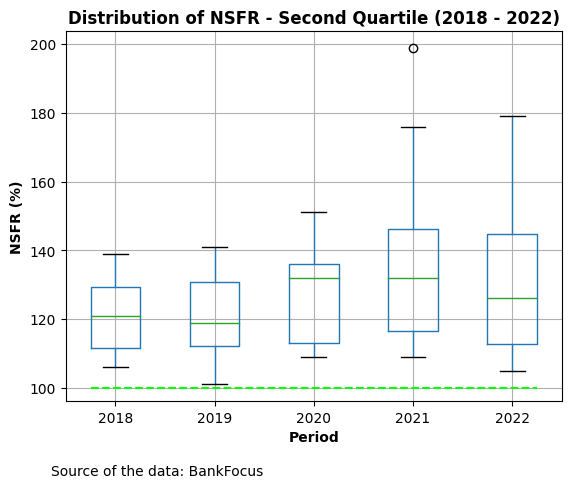

In [ ]:
bp = Quart2[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']].boxplot(fontsize=10)
bp.set_title('Distribution of NSFR - Second Quartile (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
bp.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
bp.text(-0.03, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

Text(-0.03, -0.2, 'Source of the data: BankFocus')

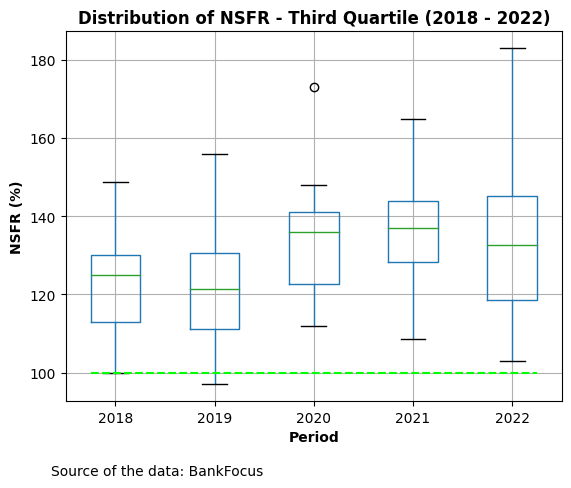

In [ ]:
bp = Quart3[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']].boxplot(fontsize=10)
bp.set_title('Distribution of NSFR - Third Quartile (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
bp.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
bp.text(-0.03, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

Text(-0.03, -0.2, 'Source of the data: BankFocus')

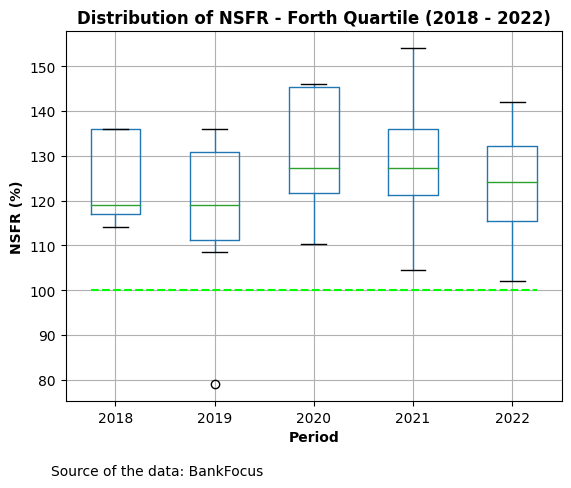

In [ ]:
bp = Quart4[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']].boxplot(fontsize=10)
bp.set_title('Distribution of NSFR - Forth Quartile (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
bp.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
bp.text(-0.03, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

<ipython-input-21-85d89c34a649>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quart1.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'}, inplace = True)
<ipython-input-21-85d89c34a649>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quart2.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'}, inplace = True)
<ipython-input-21-85d89c34a649>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

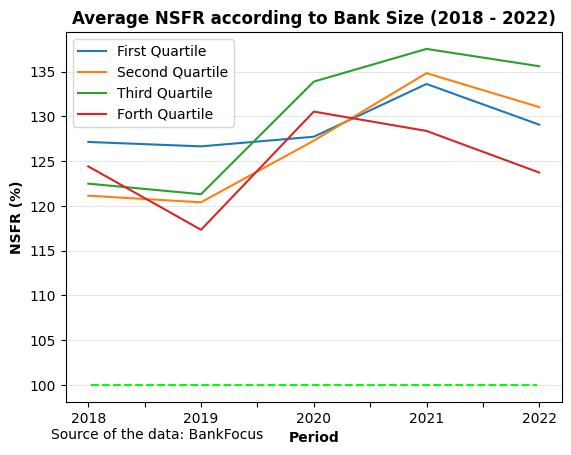

In [ ]:
Quart1.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'}, inplace = True)
Quart2.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'}, inplace = True)
Quart3.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'}, inplace = True)
Quart4.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'}, inplace = True)

fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:

Quart1[['2018', '2019', '2020', '2021', '2022']].mean().plot(ax = ax, label = 'First Quartile')
Quart2[['2018', '2019', '2020', '2021', '2022']].mean().plot(ax = ax, label = 'Second Quartile')
Quart3[['2018', '2019', '2020', '2021', '2022']].mean().plot(ax = ax, label = 'Third Quartile')
Quart4[['2018', '2019', '2020', '2021', '2022']].mean().plot(ax = ax, label = 'Forth Quartile')

plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
ax.set_title('Average NSFR according to Bank Size (2018 - 2022)', fontweight = 'bold', fontsize = 12)
ax.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
ax.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
ax.legend(frameon = True)
ax.text(-0.03, -0.1, 'Source of the data: BankFocus', transform = ax.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

## *1.2 YEAR TO YEAR ANALYSIS*

In [ ]:
def outliers_nsfr(year):
  q1, q3 = np.percentile(nsfr['NSFR_' + year].dropna(axis=0, inplace=False), [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  #create conditions to isolate the outliers
  outlier_nsfr_year = nsfr[(nsfr['NSFR_' + year] >= upper_bound) | (nsfr['NSFR_' + year] <= lower_bound)]
  return outlier_nsfr_year

The first step towards a year to year analysis is isolating each year and examining the NSFR ratio. To isolate the year we created a variable containg only the NSFR ratio for the certain year from our sample of 109 banks.

###**2018**

In [ ]:
nsfr_18 = data_object[['Company', 'Country', 'NSFR_18']]
nsfr_df_18_na = nsfr_18.dropna(axis = 'rows')
nsfr_df_18_na.shape

(32, 3)

What we see is that in the new dataframe we have 32 banks for the year 2018 with NSFR ratio not missing.

In [ ]:
def line_plot_boxplot(nsfr_df_18_na, nsfr_18, year):
  rcParams['figure.figsize'] = 15,5

  fix, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = True) # Create the figure and axes object

  sns.scatterplot(ax = ax1, data = nsfr_18, x = range(1,110), y = 'NSFR_'  + str(year)[2:])
  ax1.set_title('NSFR in ' f'{year} ({nsfr_df_18_na.shape[0]} banks)', fontweight = 'bold', fontsize = 12)
  # Set x-axis label
  ax1.set_xlabel("Banks' Identifier", fontweight = 'bold', fontsize = 10)
  # Set y-axis label
  ax1.set_ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)
  ax1.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
  ax1.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)
  ax1.text(-0.03, -0.2, 'Source of the data: BankFocus', transform = ax1.transAxes)

  nsfr_df_18_na.boxplot(ax = ax2, fontsize = 10, color = '#00E600')
  ax2.set_title('Distribution of NSFR in ' f'{year} ({nsfr_df_18_na.shape[0]} banks)', fontweight = 'bold', fontsize = 12)
  #ax2.set_xlabel(f'{year}', fontweight = 'bold', fontsize = 10)
  ax2.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

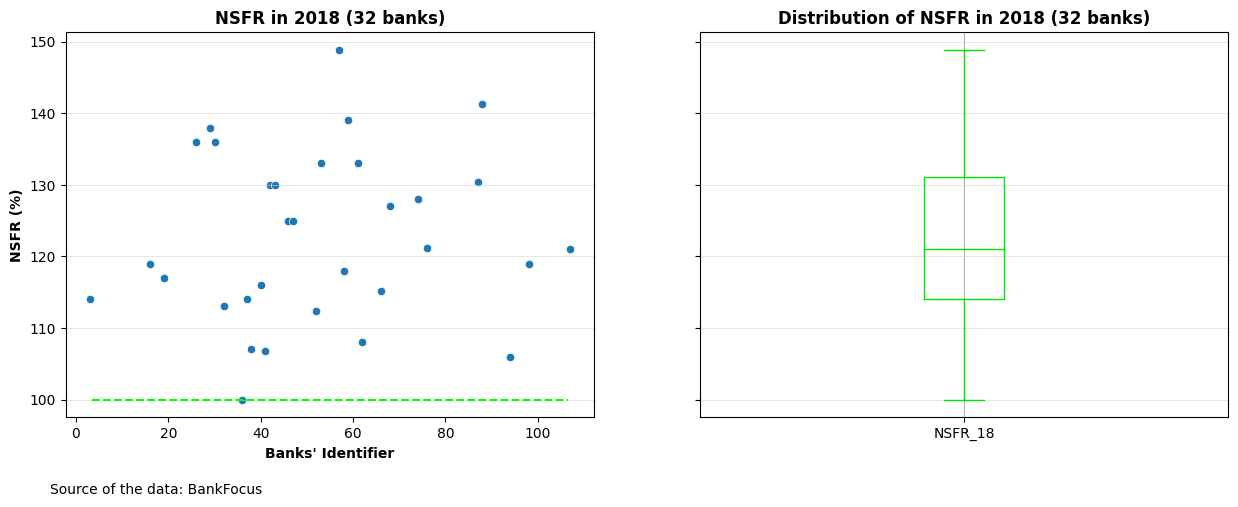

In [ ]:
line_plot_boxplot(nsfr_df_18_na, nsfr_18, 2018)

In [ ]:
nsfr_df_18_na_less = nsfr_df_18_na[(nsfr_df_18_na['NSFR_18']==100)]
nsfr_df_18_na_less

Company  Country  NSFR_18
35  LANDESBANK HESSEN-THUERINGEN GIROZENTRALE - HE...  Germany    100.0

As we can see from the boxplot we don't have the outliers.

###**2019**

In [ ]:
nsfr_19 = data_object[['Company', 'Country', 'NSFR_19']]
nsfr_df_19_na = nsfr_19.dropna(axis = 'rows')
nsfr_df_19_na.shape

(40, 3)

What we see is that in the new dataframe we have 40 banks for the year 2019 with NSFR ratio not missing.

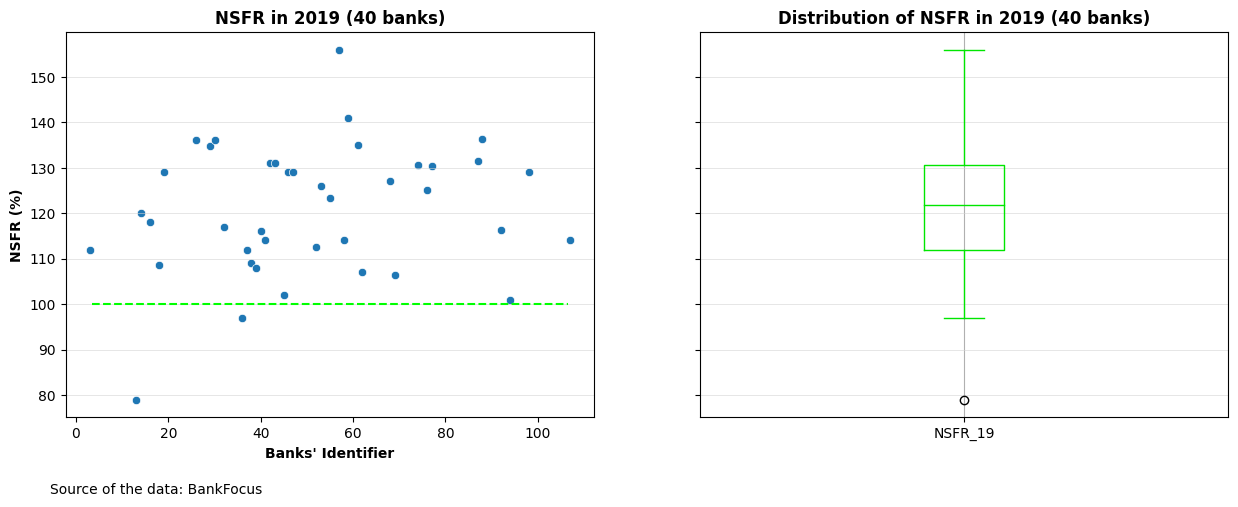

In [ ]:
line_plot_boxplot(nsfr_df_19_na, nsfr_19, 2019)

Opposite to what we were seeing till now, we see that there has been banks with less than 100% NSFR ratio in 2019.

In [ ]:
nsfr_df_19_na_less = data_object[(data_object['NSFR_19']<100)]
nsfr_df_19_na_less

Company  Country C_code  \
12   CREDIT AGRICOLE CORPORATE AND INVESTMENT BANK SA   France     C2   
35  LANDESBANK HESSEN-THUERINGEN GIROZENTRALE - HE...  Germany     C2   

     NSFR_22  NSFR_21  NSFR_20  NSFR_19  NSFR_18  LCR_22  LCR_21  LCR_20  \
12  115.5000  112.870      NaN     79.0      NaN   124.0   164.0     NaN   
35  118.5569  117.802    117.0     97.0    100.0   216.8   184.0   202.0   

    LCR_19  LCR_18  TotAss_22  TotAss_21  TotAss_20  TotAss_19  TotAss_18  
12   119.0   119.0   728202.0   599721.0   593890.0   552743.0   511702.0  
35   225.0   126.0   211502.0   212341.0   219324.0   207028.0   162968.0

The banks that do not satisfy the minimum value for the regulatory ratio NSFR (%) are CREDIT AGRICOLE CORPORATE AND INVESTMENT BANK SA and LANDESBANK HESSEN-THUERINGEN GIROZENTRALE.

In [ ]:
def prepare_for_plot_nsfr(outlier_nsfr_year):
  nsfr = outlier_nsfr_year[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22', 'Company']]
  nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019',
                                  'NSFR_20': '2020', 'NSFR_21': '2021',
                                  'NSFR_22': '2022'}, inplace = True)
  nsfr = nsfr.T
  nsfr.columns = outlier_nsfr_year['Company']
  nsfr.drop(['Company'], axis=0, inplace=True)
  return nsfr

<ipython-input-30-62b1ce51d29f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019',


Text(0, 0.5, 'NSFR (%)')

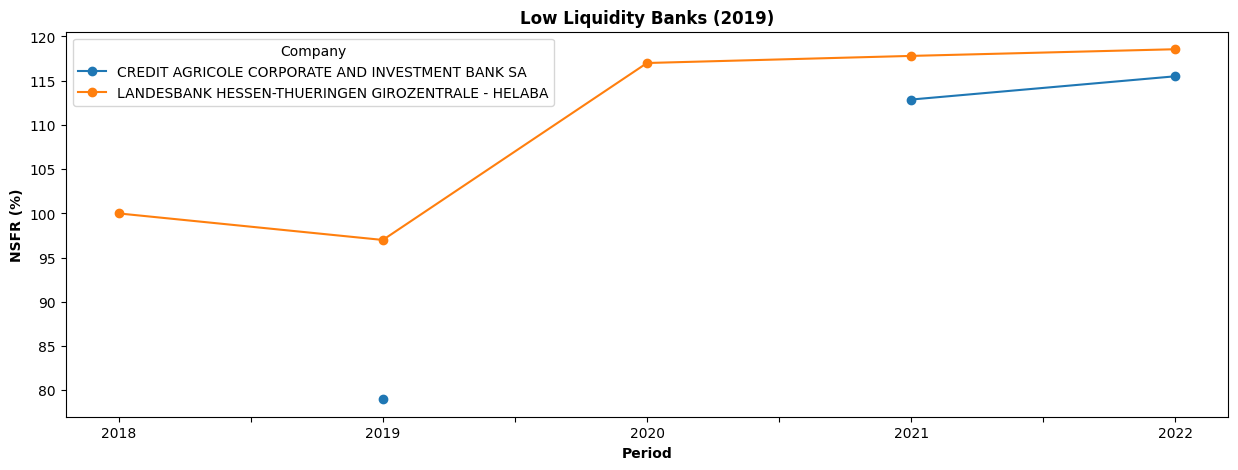

In [ ]:
nsfr_2019 = prepare_for_plot_nsfr(nsfr_df_19_na_less)
nsfr_2019.plot(marker='o')
plt.title('Low Liquidity Banks (2019)', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)

### **2020**

In [ ]:
nsfr_20 = data_object[['Company', 'Country', 'NSFR_20']]
nsfr_df_20_na = nsfr_20.dropna(axis = 'rows')
nsfr_df_20_na.shape

(45, 3)

We have 45 banks for the year 2020 with NSFR ratio not missing.

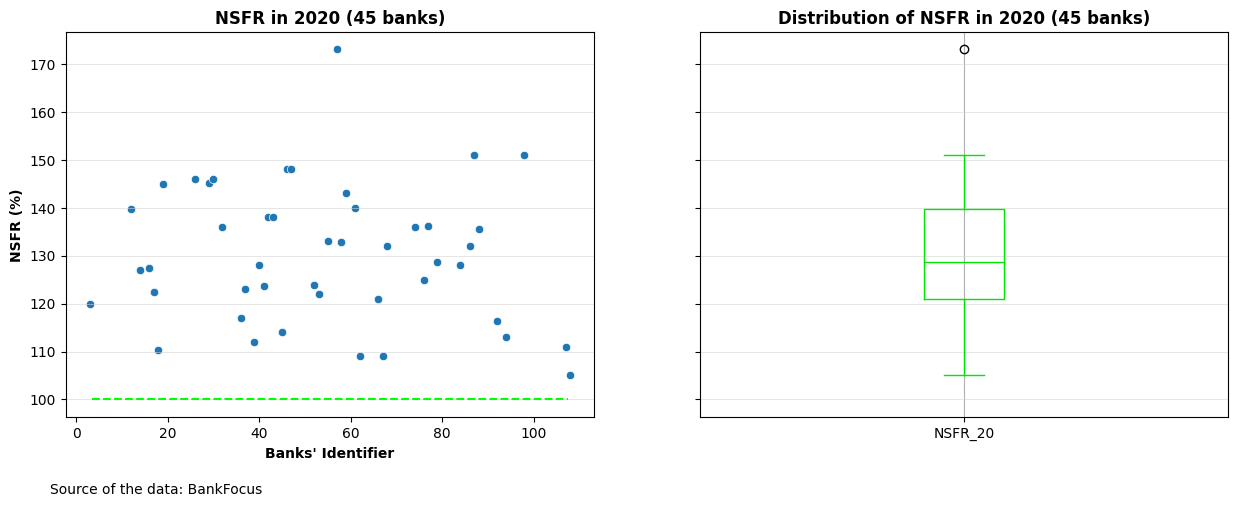

In [ ]:
line_plot_boxplot(nsfr_df_20_na, nsfr_20, 2020)

In 2020 all banks satisfy the minimum value for NSFR (%)

In [ ]:
outlier_nsfr_2020 = outliers_nsfr('20')
outlier_nsfr_2020

Company   Country  NSFR_18  NSFR_19  NSFR_20  NSFR_21  \
56  CAIXA GERAL DE DEPOSITOS  Portugal    148.9    156.0    173.0    165.0   

    NSFR_22  TotAss_18  TotAss_19  TotAss_20   TotAss_21  TotAss_22  
56    183.0  89091.417   85776.06  91375.446  104010.147   102503.0

<ipython-input-30-62b1ce51d29f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019',


Text(0, 0.5, 'NSFR (%)')

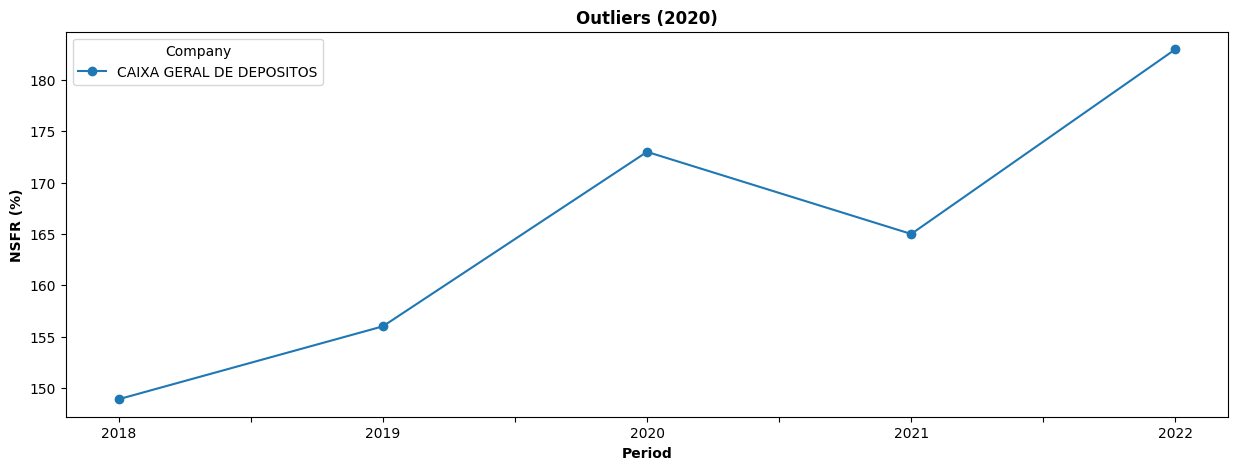

In [ ]:
nsfr_2020 = prepare_for_plot_nsfr(outlier_nsfr_2020)
nsfr_2020.plot(marker='o')
plt.title('Outliers (2020)', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)

### **2021**

In [ ]:
nsfr_21 = data_object[['Company', 'Country', 'NSFR_21']]
nsfr_df_21_na = nsfr_21.dropna(axis = 'rows')
nsfr_df_21_na.shape

(81, 3)

We have 81 banks for the year 2021 with NSFR ratio not missing.

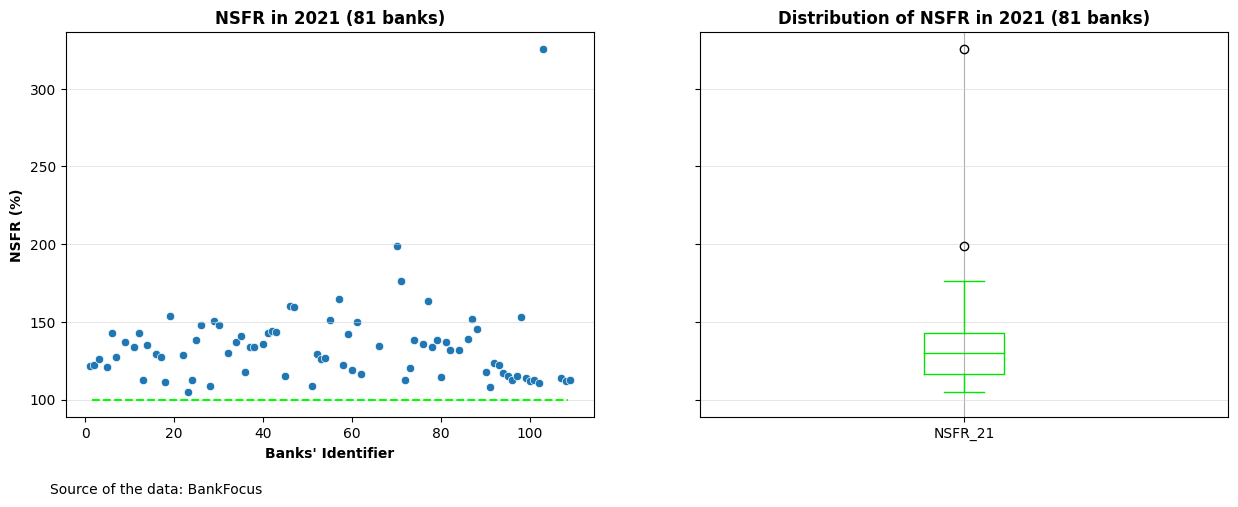

In [ ]:
line_plot_boxplot(nsfr_df_21_na, nsfr_21, 2021)

In 2021 all banks satisfy the minimum value for NSFR (%)

In [ ]:
outlier_nsfr_2021 = outliers_nsfr('21')
outlier_nsfr_2021

Company Country  NSFR_18  NSFR_19  NSFR_20  NSFR_21  \
69          BANCA MEDIOLANUM SPA   Italy      NaN      NaN      NaN   198.78   
102  FINECOBANK BANCA FINECO SPA   Italy      NaN      NaN      NaN   325.25   

     NSFR_22  TotAss_18  TotAss_19  TotAss_20  TotAss_21  TotAss_22  
69    179.00  47374.365  53437.634  59029.046  73522.370  73598.890  
102   352.76  24732.630  28022.907  31755.017  33867.175  36268.885

<ipython-input-30-62b1ce51d29f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019',


Text(0, 0.5, 'NSFR (%)')

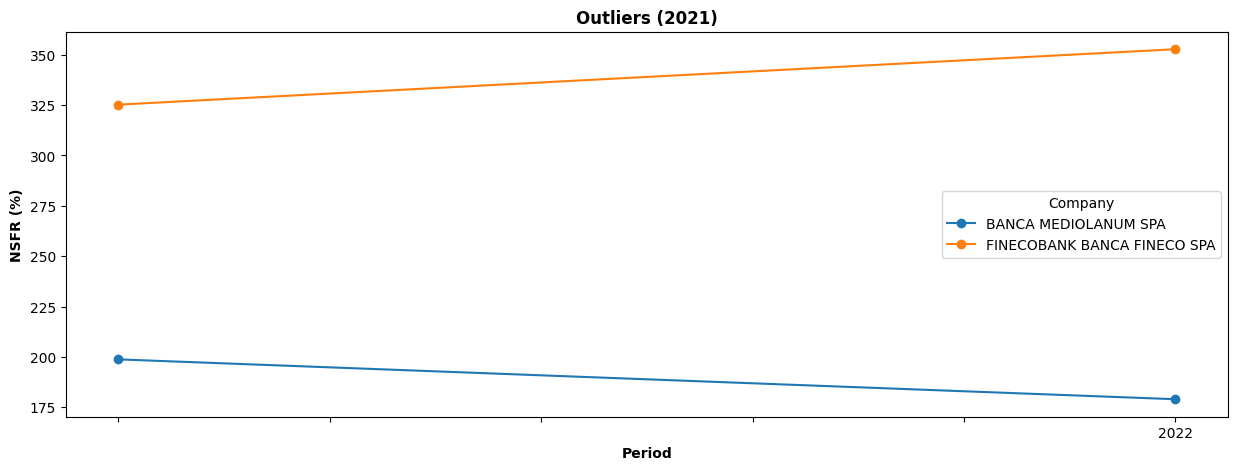

In [ ]:
nsfr_2021 = prepare_for_plot_nsfr(outlier_nsfr_2021)
nsfr_2021.plot(marker='o')
plt.title('Outliers (2021)', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)

### **2022**

In [ ]:
nsfr_22 = data_object[['Company', 'Country', 'NSFR_22']]
nsfr_df_22_na = nsfr_22.dropna(axis = 'rows')
nsfr_df_22_na.shape

(82, 3)

What we see is that in the new dataframe we have 82 banks for the year 2022 with NSFR ratio not missing.

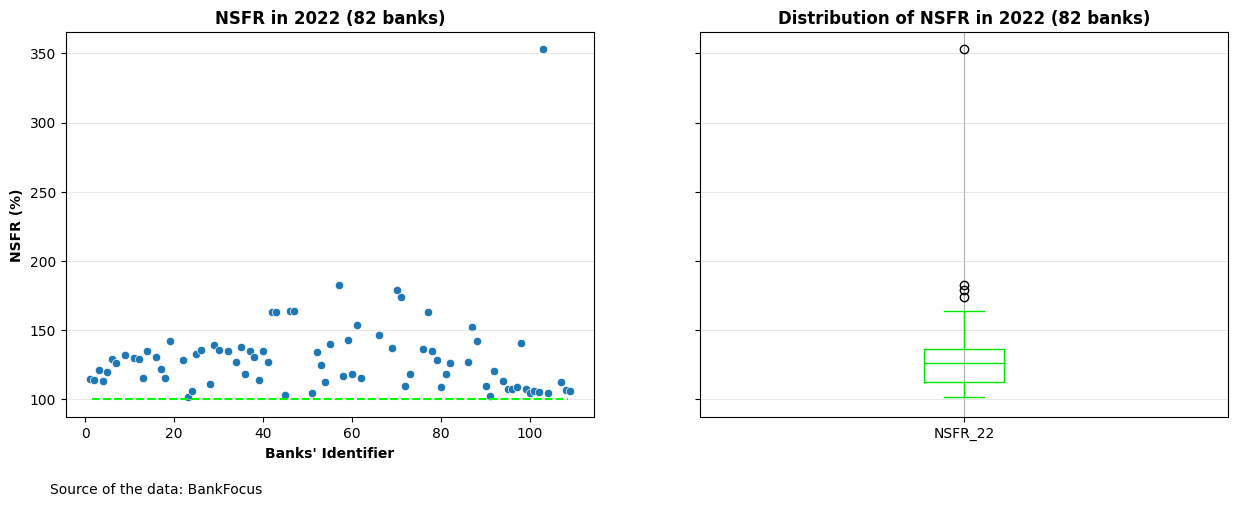

In [ ]:
line_plot_boxplot(nsfr_df_22_na, nsfr_22, 2022)

In [ ]:
outlier_nsfr_2022 = outliers_nsfr('22')
outlier_nsfr_2022

Company      Country  NSFR_18  NSFR_19  NSFR_20  \
56      CAIXA GERAL DE DEPOSITOS     Portugal    148.9    156.0    173.0   
69          BANCA MEDIOLANUM SPA        Italy      NaN      NaN      NaN   
70             DE VOLKSBANK N.V.  Netherlands      NaN      NaN      NaN   
102  FINECOBANK BANCA FINECO SPA        Italy      NaN      NaN      NaN   

     NSFR_21  NSFR_22  TotAss_18  TotAss_19  TotAss_20   TotAss_21   TotAss_22  
56    165.00   183.00  89091.417  85776.060  91375.446  104010.147  102503.000  
69    198.78   179.00  47374.365  53437.634  59029.046   73522.370   73598.890  
70    176.00   174.04  60948.000  62841.000  67484.000   72081.000   73155.000  
102   325.25   352.76  24732.630  28022.907  31755.017   33867.175   36268.885

<ipython-input-30-62b1ce51d29f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019',


Text(0, 0.5, 'NSFR (%)')

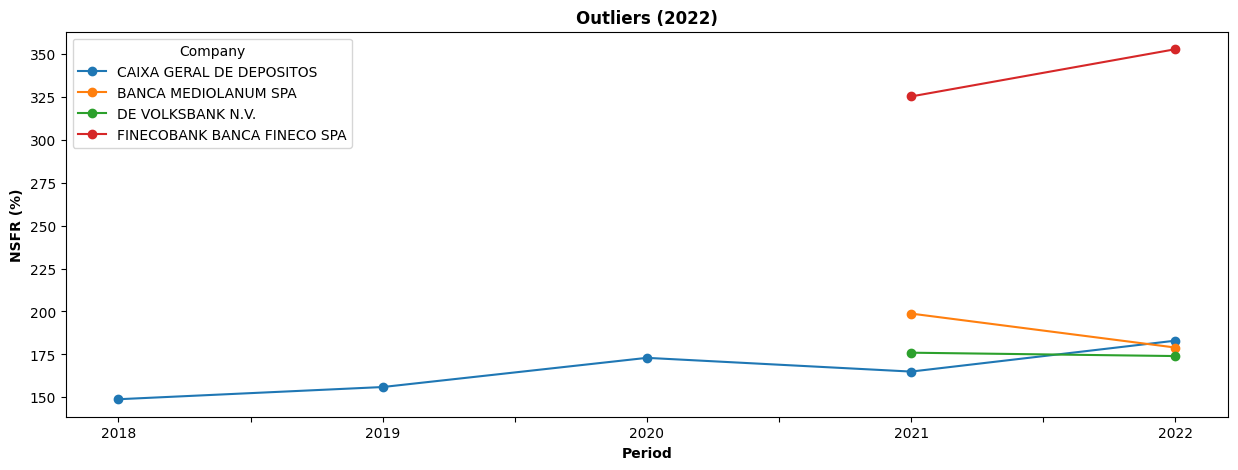

In [ ]:
nsfr_2022 = prepare_for_plot_nsfr(outlier_nsfr_2022)
nsfr_2022.plot(marker='o')
plt.title('Outliers (2022)', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('NSFR (%)', fontweight = 'bold', fontsize = 10)

## *1.3. COUNTRY*

Let's consider the average of Net Stable Funding Ratio across the **countries** where the banks within our dataset are domicled.

The idea is to consider the banks from the samples as rapresentative for the country within the sample. In the last part of the analysis we will do a general analysis of the Euro Area with data that has been taken from the SDW of the ECB which could be considered as the representative data for the countries in general.

In [ ]:
# create the dataset with NSFR by country
nsfr_by_country = nsfr_only_df.groupby(by = nsfr_df['Country']).mean()
nsfr_by_country = nsfr_by_country.iloc[:, ::1]
nsfr_by_country = nsfr_by_country.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
nsfr_by_country

2018     2019      2020       2021       2022
Country                                                       
Austria      126.0000  123.400  134.1000  141.86500  137.05000
Belgium      132.3250  131.065  138.8975  144.29000  137.29250
France       115.5000  115.500  134.4200  126.00000  126.00000
Germany      110.5000  105.500  114.0000  115.90100  115.62845
Ireland      127.5000  130.000  143.0000  151.90000  163.50250
Italy        112.0500  114.650  120.3700  131.03415  128.41480
Netherlands  126.0000  122.000  124.7400  127.75000  127.82500
Portugal     126.7250  130.250  144.2500  146.25000  147.75000
Spain        125.1125  128.355  139.7500  143.50000  139.67500

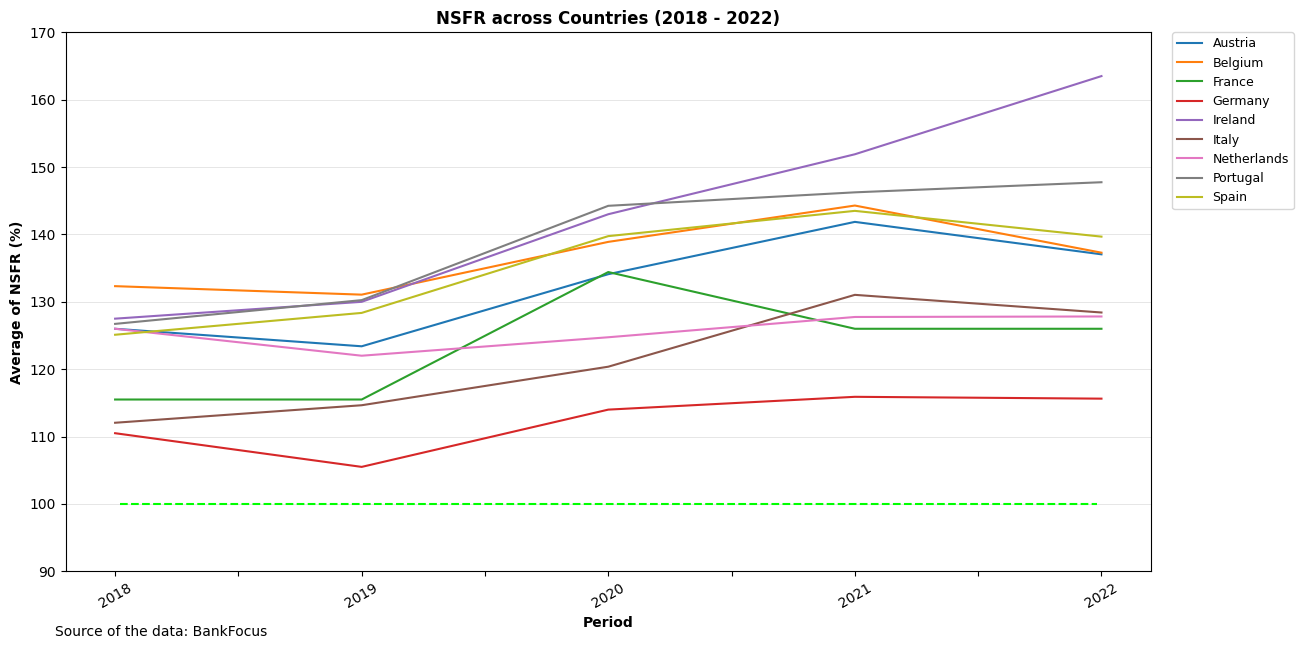

In [ ]:
# COUNTRY
pl = nsfr_by_country.T.plot(rot = 30, figsize = (14, 7))
pl.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=9)
pl.set_title('NSFR across Countries (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of NSFR (%)', fontweight = 'bold', fontsize = 10)
plt.ylim(90, 170)
pl.text(-0.01, -0.12, 'Source of the data: BankFocus', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

Inspecting the graph by considering only the *9* countries in which banks show the available data for the entire period, we can infer that all the *28* observations of the sample satisfy the requirement **NSFR > 100%**.

With the objective of evaluating the situaution from a micro point of view, we separate each country into a graph:

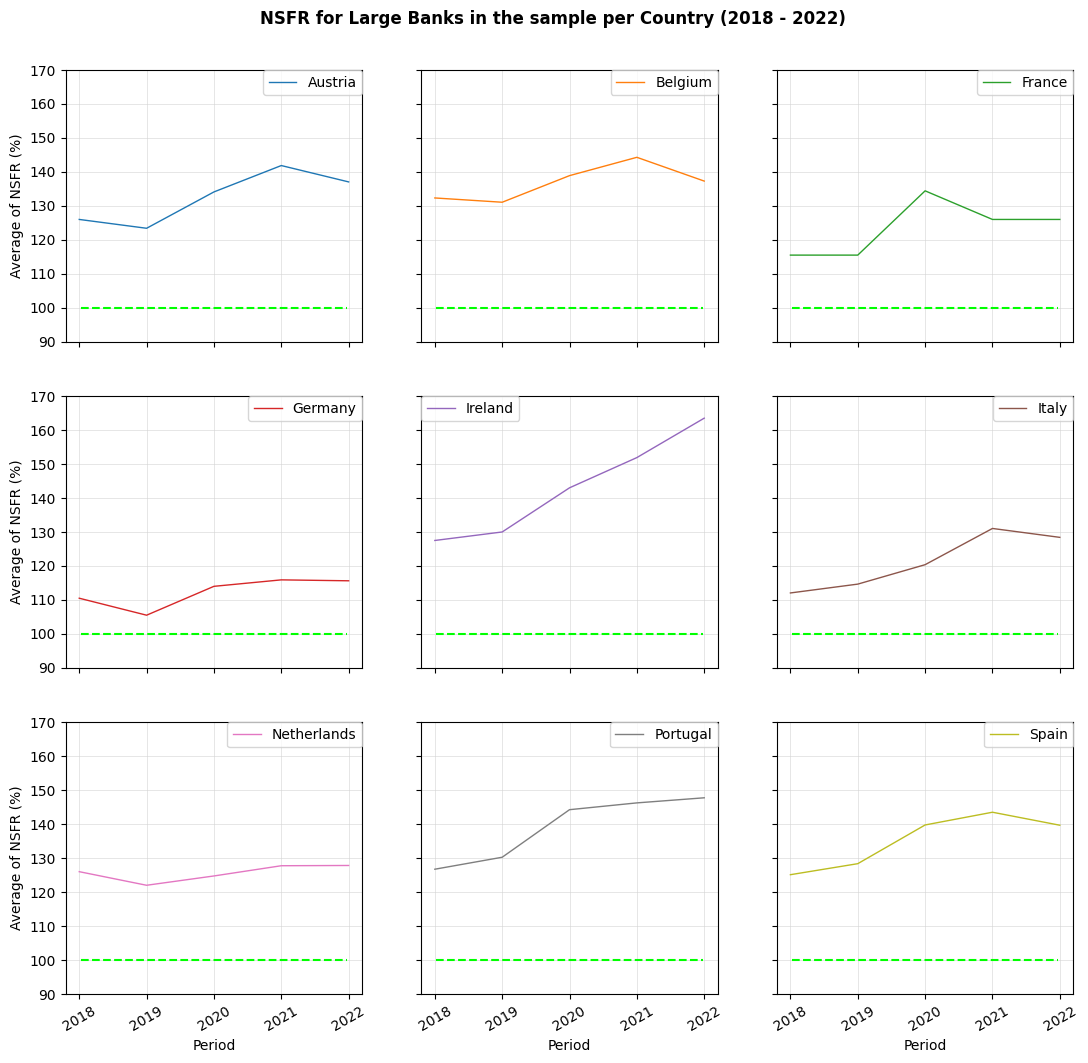

In [ ]:
# EACH COUNTRY
nsfr_by_country.T.plot(subplots = True, layout = (3, 3), figsize = (13, 12), sharey = True,
                    rot = 30,  ylabel = 'Average of NSFR (%)', xlabel = 'Period', linewidth = 1)
plt.gcf().suptitle('NSFR for Large Banks in the sample per Country (2018 - 2022)', fontsize = 12, fontweight = 'bold', y = 0.93)

for ax in plt.gcf().axes:
    ax.legend(loc = 'best', frameon = True, borderaxespad = 0)
    ax.grid(color = 'lightgrey', linewidth = 0.4)
    ax.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
    plt.ylim(90, 170)

# **2. LCR**

Let's now consider the **Liquidity Coverage Ratio**.

The **LCR** refers to the proportion of *highly liquid* assets held by financial institutions, to ensure their ongoing ability to meet *short-term* obligations. It aims to ensure that a bank maintains an adeguate level of *unecumbered*, high-quality liquid assets that can be converted into cash to meet ist liquidity needs for **30** calendar **days** time horizon.

The ratio is given by the ***high-quality*** liquid assets amount (HQLA) over the total ***net*** cash flows, that has to be *greater* than ***100%***.

The *high-quality* liquid assets include only those with a high potential to be converted *easily* and quickly into cash.

In [ ]:
lcr = data_object[['Company', 'Country', 'LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22',
                    'TotAss_18', 'TotAss_19', 'TotAss_20', 'TotAss_21', 'TotAss_22']]
#lcr
lcr.shape

(109, 12)

Text(-0.01, -0.1, 'Source of the data: BankFocus')

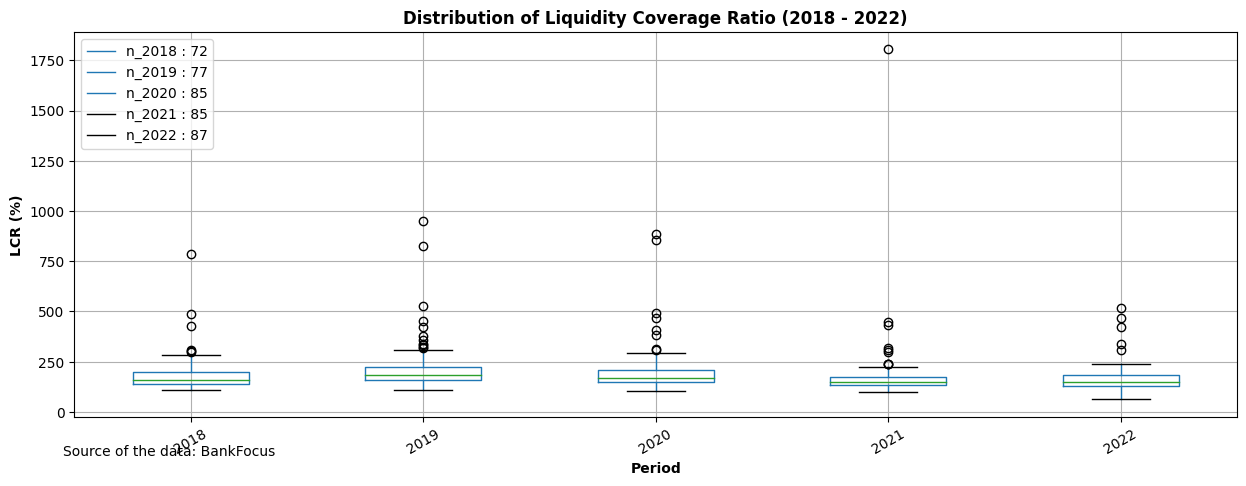

In [ ]:
lcr_only = lcr[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
#lcr_only

bp = lcr_only.iloc[:, ::-1].boxplot(rot = 30)
nobs = lcr[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']].count()
nobs = [str(x) for x in nobs.tolist()]
nobs = [f'LCR_{18+i} n:{nobs[i]}' for i in range(len(nobs))]
bp.legend(['n_2018 : 72', 'n_2019 : 77', 'n_2020 : 85', 'n_2021 : 85', 'n_2022 : 87'], frameon = True, loc = 'upper left')
bp.set_title('Distribution of Liquidity Coverage Ratio (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
bp.text(-0.01, -0.1, 'Source of the data: BankFocus', transform = bp.transAxes)

In [ ]:
# drop rows with NaN
lcr_df = lcr.dropna(axis = 'rows')
#lcr_df

lcr_df.shape

(63, 12)

Text(-0.01, -0.1, 'Source of the data: BankFocus')

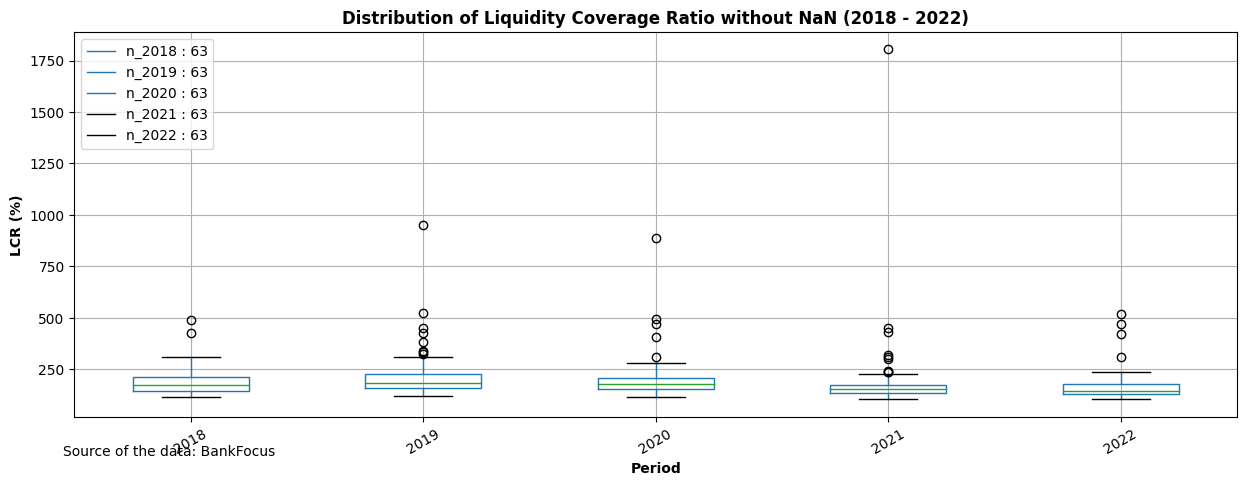

In [ ]:
lcr_only_df = lcr_df[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
#lcr_only_df

bp = lcr_only_df.iloc[:, ::-1].boxplot(rot = 30)
nobs = lcr[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']].count()
nobs = [str(x) for x in nobs.tolist()]
nobs = [f'LCR_{18+i} n:{nobs[i]}' for i in range(len(nobs))]
bp.set_title('Distribution of Liquidity Coverage Ratio without NaN (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.legend(['n_2018 : 63', 'n_2019 : 63', 'n_2020 : 63', 'n_2021 : 63', 'n_2022 : 63'], frameon = True, loc = 'upper left')
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
bp.text(-0.01, -0.1, 'Source of the data: BankFocus', transform = bp.transAxes)

## *2.1. SIZE*

**We decided to separate the banks into 8 subsets according to their total assets so as to see the behvaior of each quartile in terms of liquidity. In this part we analyse each quartile's behavior in terms of liquidity coverage ratio.**

In [ ]:
quartiles = data_object['TotAss_18'].quantile([.25, .5, .75]).tolist()
print(quartiles)

[45983.602, 80462.0, 245200.953]


In [ ]:
Quart1 = data_object[(data_object['TotAss_18'] <= 45983.602)]
Quart2 = data_object[(data_object['TotAss_18'] > 45983.602) & (data_object['TotAss_18'] <= 80462.0)]
Quart3 = data_object[(data_object['TotAss_18'] > 80462.0) & (data_object['TotAss_18'] <= 245200.953)]
Quart4 = data_object[(data_object['TotAss_18'] > 245200.953)]

Text(-0.02, -0.2, 'Source of the data: BankFocus')

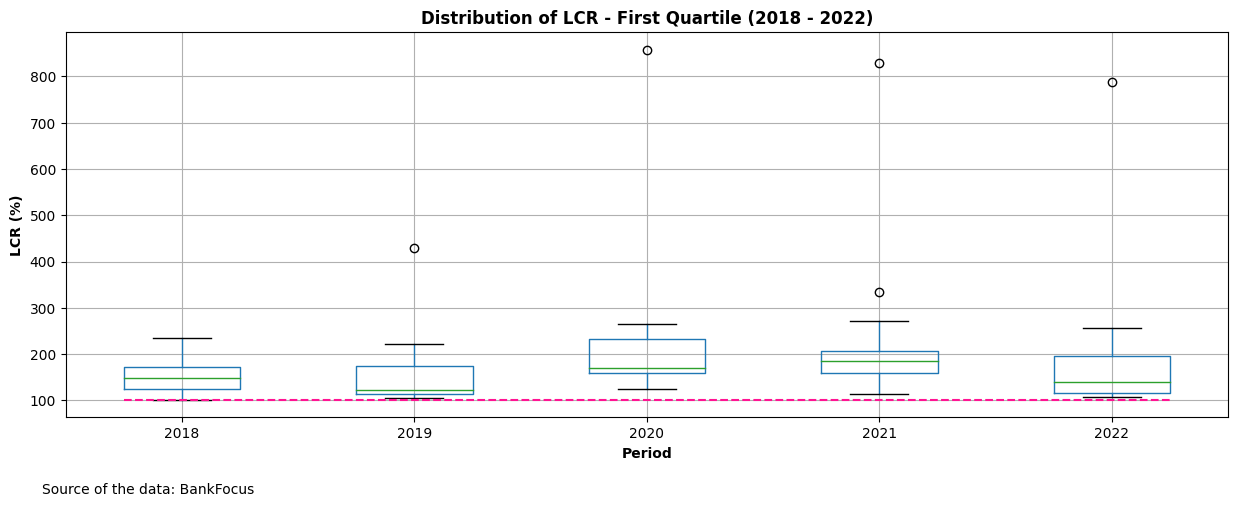

In [ ]:
bp = Quart1[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']].boxplot(fontsize=10)
bp.set_title('Distribution of LCR - First Quartile (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
bp.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
bp.text(-0.02, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

Text(-0.02, -0.2, 'Source of the data: BankFocus')

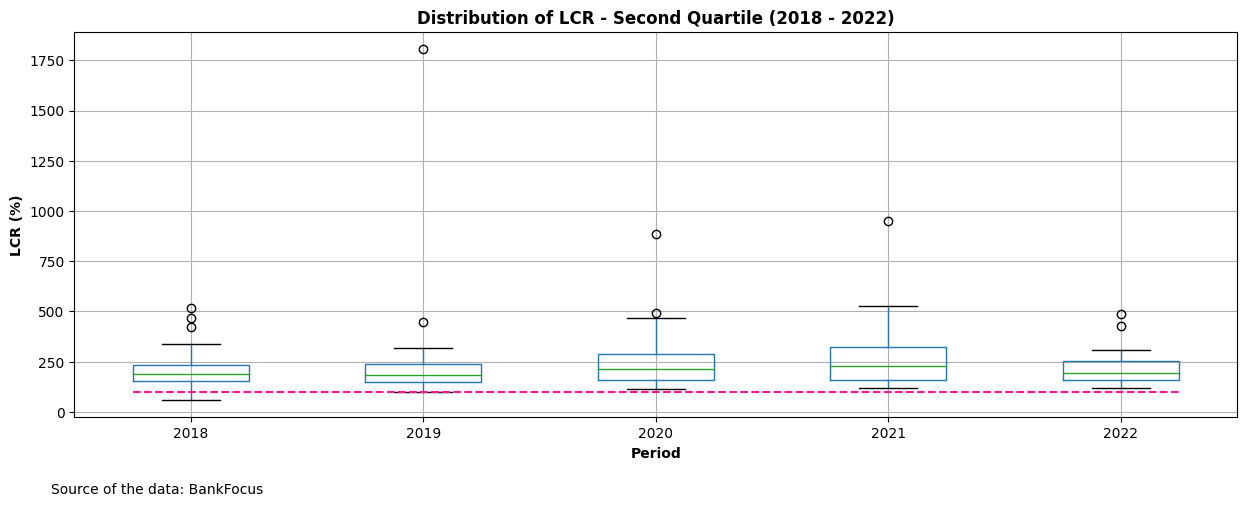

In [ ]:
bp = Quart2[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']].boxplot(fontsize=10)
bp.set_title('Distribution of LCR - Second Quartile (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
bp.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
bp.text(-0.02, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

Text(-0.02, -0.2, 'Source of the data: BankFocus')

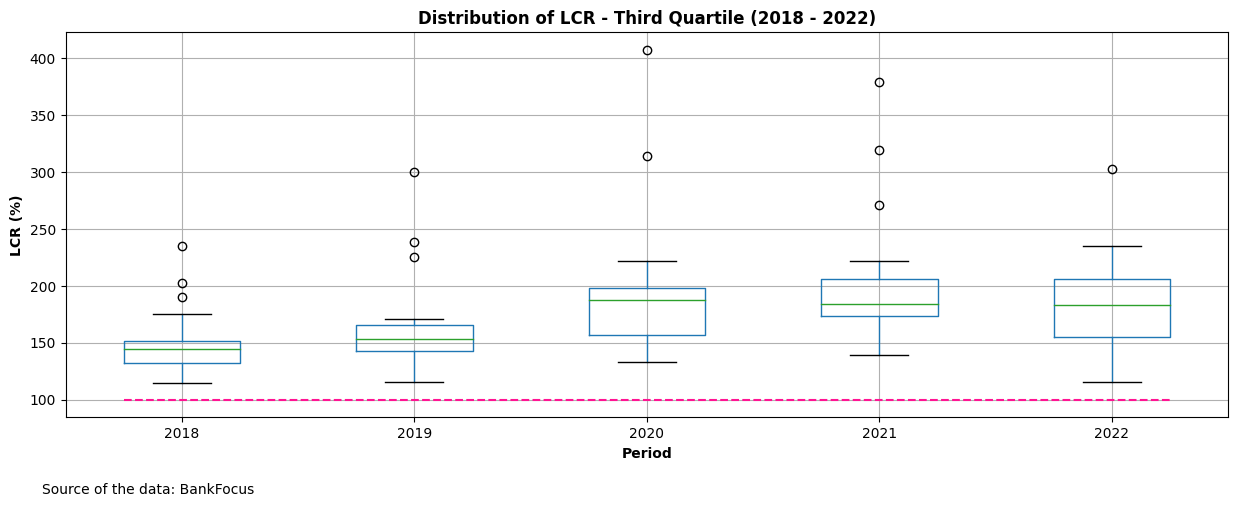

In [ ]:
bp = Quart3[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']].boxplot(fontsize=10)
bp.set_title('Distribution of LCR - Third Quartile (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
bp.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
bp.text(-0.02, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

Text(-0.02, -0.2, 'Source of the data: BankFocus')

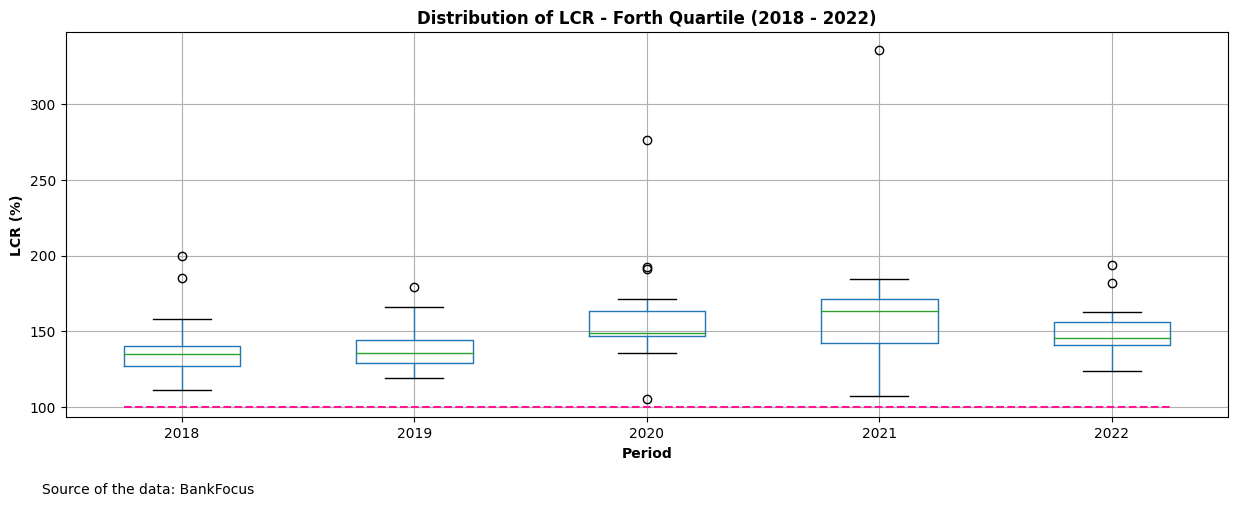

In [ ]:
bp = Quart4[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']].boxplot(fontsize=10)
bp.set_title('Distribution of LCR - Forth Quartile (2018 - 2022)', fontweight = 'bold', fontsize = 12)
bp.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
bp.set_xticklabels(['2018', '2019', '2020', '2021', '2022'])
bp.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
bp.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
bp.text(-0.02, -0.2, 'Source of the data: BankFocus', transform = bp.transAxes)

<ipython-input-57-eda56724ceb2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quart1.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'}, inplace = True)
<ipython-input-57-eda56724ceb2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Quart2.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'}, inplace = True)
<ipython-input-57-eda56724ceb2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

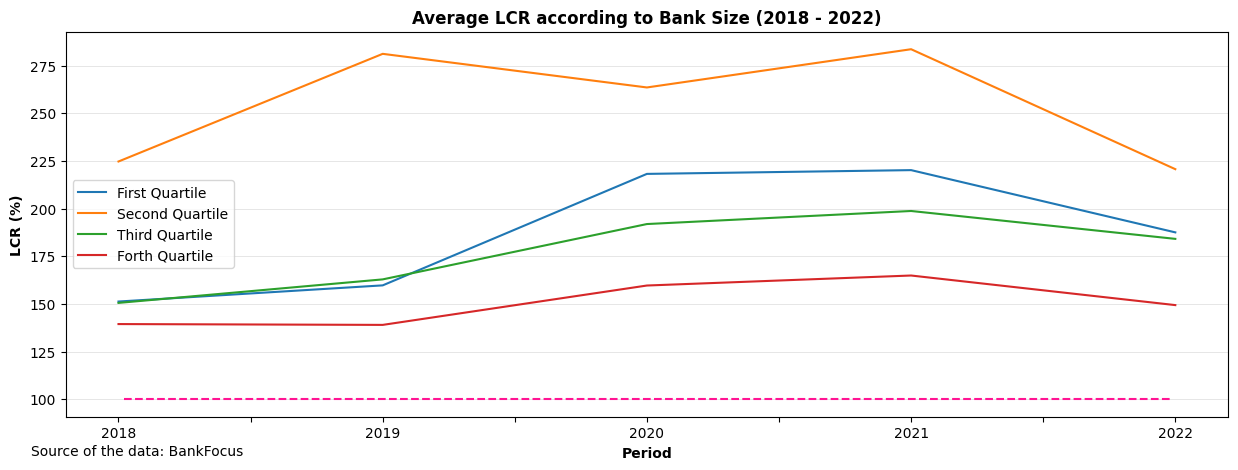

In [ ]:
fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
Quart1.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'}, inplace = True)
Quart2.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'}, inplace = True)
Quart3.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'}, inplace = True)
Quart4.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'}, inplace = True)

Quart1[['2018', '2019', '2020', '2021', '2022']].mean().plot(ax = ax, label = 'First Quartile')
Quart2[['2018', '2019', '2020', '2021', '2022']].mean().plot(ax = ax, label = 'Second Quartile')
Quart3[['2018', '2019', '2020', '2021', '2022']].mean().plot(ax = ax, label = 'Third Quartile')
Quart4[['2018', '2019', '2020', '2021', '2022']].mean().plot(ax = ax, label = 'Forth Quartile')


plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left', borderaxespad = 0)
ax.set_title('Average LCR according to Bank Size (2018 - 2022)', fontweight = 'bold', fontsize = 12)
ax.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
ax.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
ax.text(-0.03, -0.1, 'Source of the data: BankFocus', transform = ax.transAxes)
ax.legend(frameon = True)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

## *2.2 YEAR TO YEAR ANALYSIS*



The first step towards a year to year analysis is isolating each year and examining the LCR ratio. To isolate the year we created a varibale containg only the LCR ratio for teh ceratin year from our sample of 109 banks.

In [ ]:
def outliers_lcr(year):
  q1, q3 = np.percentile(lcr['LCR_' + year].dropna(axis=0, inplace=False), [25, 75])
  iqr = q3 - q1

  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr

  #create conditions to isolate the outliers
  outlier_lcr_year = lcr[(lcr['LCR_' + year] >= upper_bound) | (lcr['LCR_' + year] <= lower_bound)]
  return outlier_lcr_year

### **2018**

In [ ]:
lcr_18 = data_object[['Company', 'Country', 'LCR_18']]
lcr_df_18_na = lcr_18.dropna(axis = 'rows')
lcr_df_18_na.shape

(72, 3)

What we see is that in the new dataframe we have 72 banks for the year 2018  with LCR ratio not missing.

In [ ]:
def line_plot_boxplot2(lcr_df_18_na, lcr_18, year):
  rcParams['figure.figsize'] = 15,5

  fix, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharey = True) # Create the figure and axes object

  sns.scatterplot(ax = ax1, data = lcr_18, x = range(1,110), y = 'LCR_'  + str(year)[2:])
  ax1.set_title('LCR in ' f'{year} ({lcr_df_18_na.shape[0]} banks)', fontweight = 'bold', fontsize = 12)
  # Set x-axis label
  ax1.set_xlabel("Banks' Identifier", fontweight = 'bold', fontsize = 10)
  # Set y-axis label
  ax1.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
  ax1.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
  ax1.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)
  ax1.text(-0.01, -0.2, 'Source of the data: BankFocus', transform = ax1.transAxes)

  lcr_df_18_na.boxplot(ax = ax2, fontsize = 10, color = '#F72585')
  ax2.set_title('Distribution of LCR in ' f'{year} ({lcr_df_18_na.shape[0]} banks)', fontweight = 'bold', fontsize = 12)
  #ax2.set_xlabel(f'{year}', fontweight = 'bold', fontsize = 10)
  ax2.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

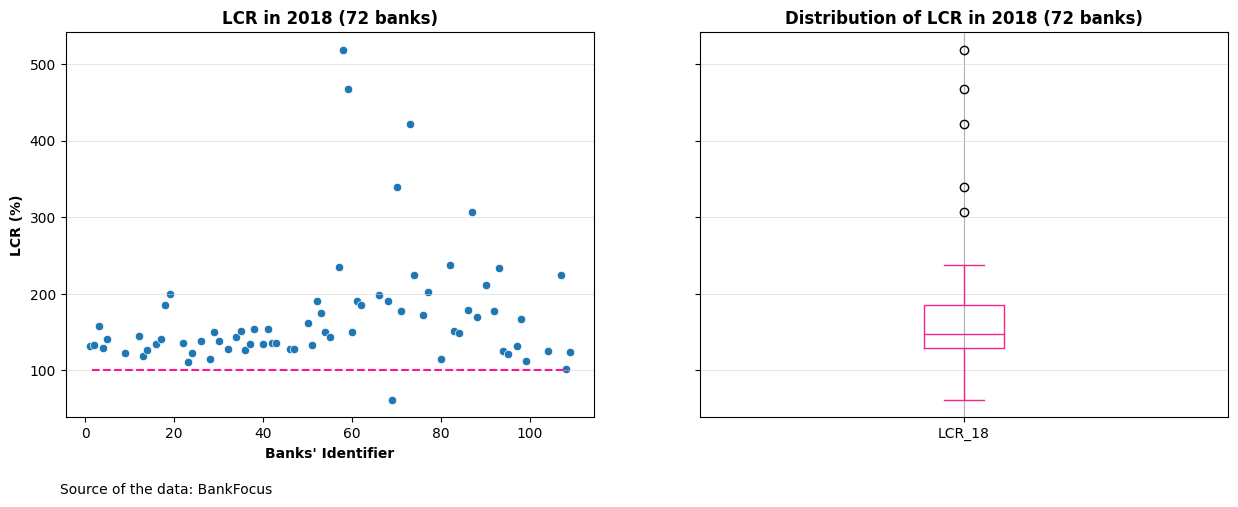

In [ ]:
line_plot_boxplot2(lcr_df_18_na, lcr_18, 2018)

Opposite to what we were seeing till now, we see that there has been a bank with less than 100% LCR ratio in 2018.

*The bank that does not satisfy the minimum value for the regulatory ratio LCR(%) is PIRAEUS FINANCIAL HOLDINGS SA and is only one withi the samplw with 72 banks.*

In [ ]:
lcr_df_18_na_less = data_object[(data_object['LCR_18']<=100)]
lcr_df_18_na_less

Company Country C_code  NSFR_22  NSFR_21  NSFR_20  \
68  PIRAEUS FINANCIAL HOLDINGS SA  Greece     C2    137.0      NaN      NaN   

    NSFR_19  NSFR_18  LCR_22  LCR_21  LCR_20  LCR_19  LCR_18  TotAss_22  \
68    106.4      NaN   201.0     NaN     NaN     NaN    62.0    75661.0   

    TotAss_21  TotAss_20  TotAss_19  TotAss_18  
68    79789.0    71560.0    61231.0    61880.0

In [ ]:
outlier_lcr_2018 = outliers_lcr('18')
outlier_lcr_2018

Company Country  LCR_18   LCR_19  LCR_20  LCR_21  LCR_22  \
57             BPIFRANCE  France  519.00   450.00  885.96  425.00   427.0   
58      UNICAJA BANCO SA   Spain  468.00   319.00  310.00  307.00   284.0   
69  BANCA MEDIOLANUM SPA   Italy  340.00      NaN  382.27  356.29   299.0   
72                  SFIL  France  422.00  1804.00  193.00  949.00   161.0   
86     IBERCAJA BANCO SA   Spain  306.78   307.07  468.11  452.03   306.5   

    TotAss_18  TotAss_19  TotAss_20   TotAss_21   TotAss_22  
57  57379.800  59163.100  94316.000  100848.100  101609.200  
58  57504.179  56707.615  65544.265  115549.993   99003.053  
69  47374.365  53437.634  59029.046   73522.370   73598.890  
72  72722.000  74796.000  77036.000   74799.000   66608.000  
86  52705.739  55422.015  58400.790   58631.409   54360.706

In [ ]:
def prepare_for_plot_lcr(outlier_lcr_year):
  lcr = outlier_lcr_year[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22', 'Company']]
  lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019',
                                  'LCR_20': '2020', 'LCR_21': '2021',
                                  'LCR_22': '2022'}, inplace = True)
  lcr = lcr.T
  lcr.columns = outlier_lcr_year['Company']
  lcr.drop(['Company'], axis=0, inplace=True)
  return lcr

<ipython-input-64-572040db31be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019',


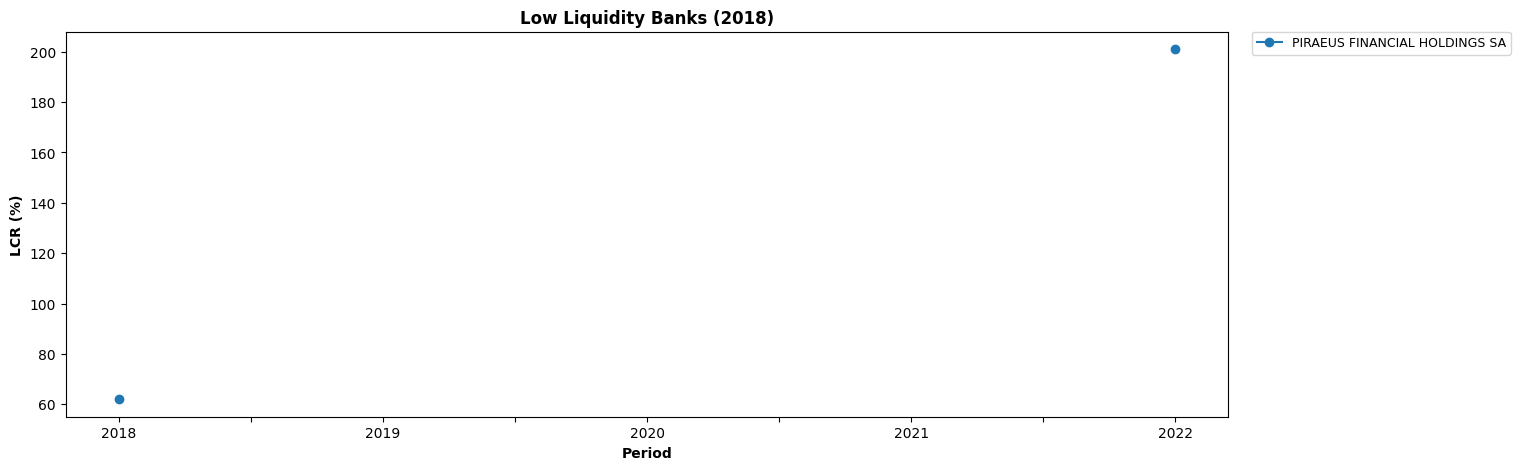

In [ ]:
lcr_2018 = prepare_for_plot_lcr(lcr_df_18_na_less)
lcr_2018.plot(marker='o')
plt.title('Low Liquidity Banks (2018)', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=9)

<ipython-input-64-572040db31be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019',


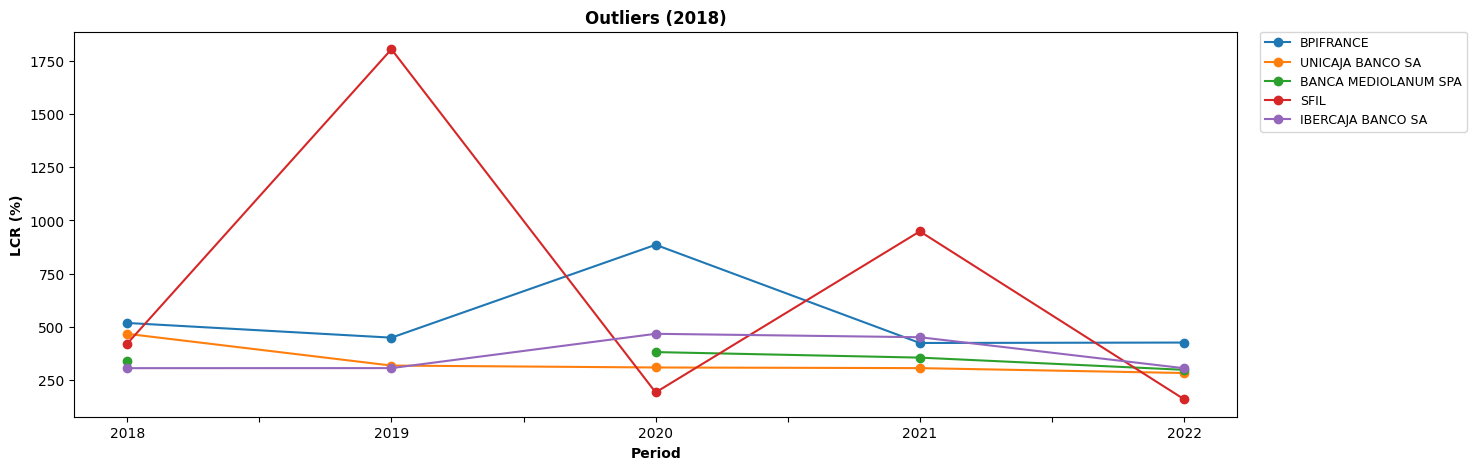

In [ ]:
lcr_2018 = prepare_for_plot_lcr(outlier_lcr_2018)
lcr_2018.plot(marker='o')
plt.title('Outliers (2018)', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=9)

Considering the presence of outliers, we decided to remove them and get a second view of the situation of the LcR ratio for the year 2019 in our sample.
The banks decreased to 67 in this case.

We see that the presence of the Greek bank that was not close to the regularoty min in 2018, however we see that the mean value is 1.5 times the regulatory min required and we also see the standard deviation of 35.31954738460901.

### **2019**

In [ ]:
lcr_19 = data_object[['Company', 'Country', 'LCR_19']]
lcr_df_19_na = lcr_19.dropna(axis = 'rows')
lcr_df_19_na.shape

(77, 3)

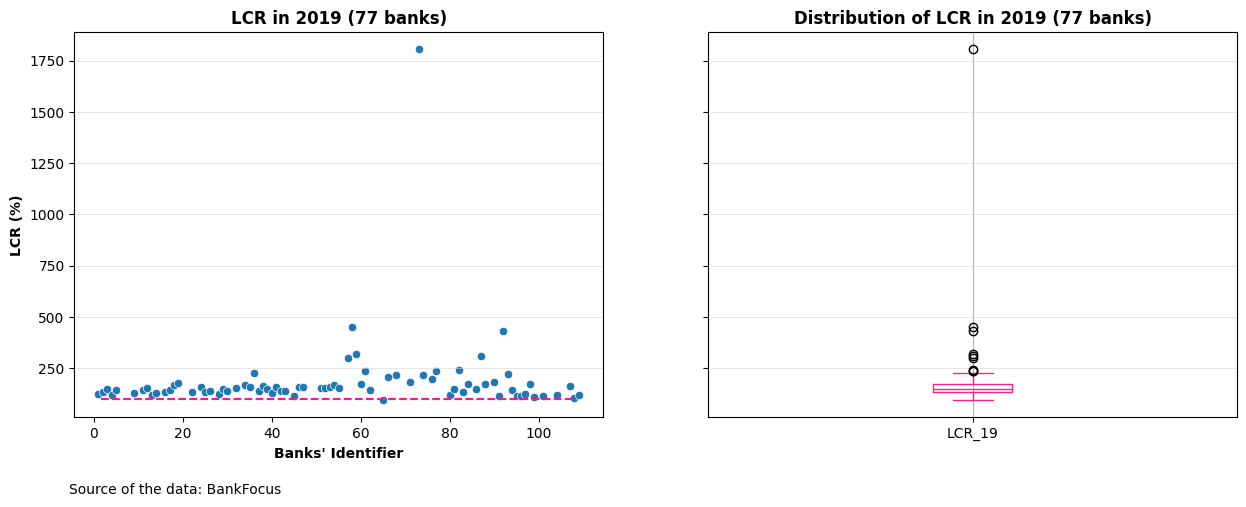

In [ ]:
line_plot_boxplot2(lcr_df_19_na, lcr_19, 2019)

For 2019 we see that we have 77 banks with LCR not missing.

In [ ]:
lcr_df_19_na_less=lcr_df_19_na[(lcr_df_19_na['LCR_19']<100)]
lcr_df_19_na_less.head()

Company Country  LCR_19
64  EUROBANK ERGASIAS SERVICES AND HOLDINGS SA  Greece    97.0

As in the case of the year 2018 we see that on the year 2019 there was a bank that did not comply with the 100% LCR ratio even though now the ratio is much closer to the 100% regulatory requirement and once again the bank domciled in Greece.

In [ ]:
outlier_lcr_2019 = outliers_lcr('19')
outlier_lcr_2019

Company   Country  LCR_18   LCR_19  LCR_20  LCR_21  \
56       CAIXA GERAL DE DEPOSITOS  Portugal  234.60   300.00  407.64  379.50   
57                      BPIFRANCE    France  519.00   450.00  885.96  425.00   
58               UNICAJA BANCO SA     Spain  468.00   319.00  310.00  307.00   
60  BANCO COMERCIAL PORTUGUES, SA  Portugal  190.00   237.00  230.00  269.00   
72                           SFIL    France  422.00  1804.00  193.00  949.00   
76                       DEXIA SA   Belgium  202.00   238.00  222.00  176.00   
81                  RCI BANQUE SA    France  237.00   239.00  492.02  525.00   
86              IBERCAJA BANCO SA     Spain  306.78   307.07  468.11  452.03   
91       MUNICIPALITY FINANCE PLC   Finland  177.00   430.20  264.40  334.90   

    LCR_22   TotAss_18   TotAss_19   TotAss_20   TotAss_21   TotAss_22  
56   303.0   89091.417   85776.060   91375.446  104010.147  102503.000  
57   427.0   57379.800   59163.100   94316.000  100848.100  101609.200  
58   284.0   57504.179   56707.615   65544.265  115549.993   99003.053  
60   212.0   75923.049   81643.408   85813.421   92904.812   89860.541  
72   161.0   72722.000   74796.000   77036.000   74799.000   66608.000  
76   177.0  158804.000  120326.000  114427.000   98650.000   64288.000  
81   487.0   53394.000   58080.000   58886.000   56236.000   60424.000  
86   306.5   52705.739   55422.015   58400.790   58631.409   54360.706  
91   256.7   35676.739   38933.758   44042.426   46360.060   47736.293

<ipython-input-64-572040db31be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019',


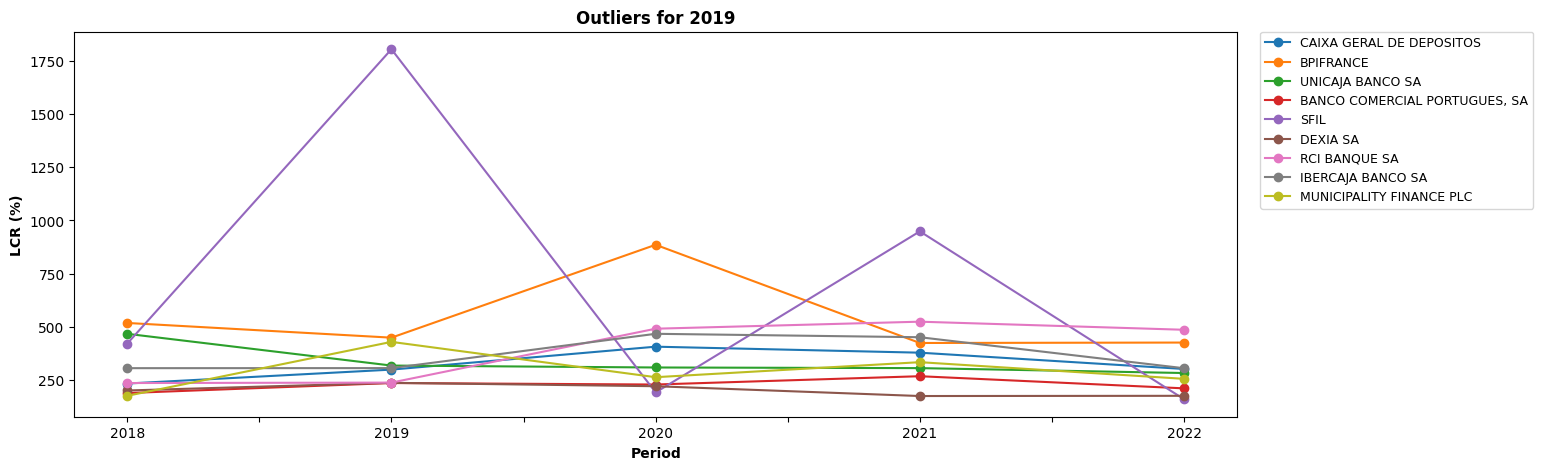

In [ ]:
lcr_2019 = prepare_for_plot_lcr(outlier_lcr_2019)
lcr_2019.plot(marker='o')
plt.title('Outliers for 2019', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=9)

Considering that there seem to be a lot of outliers, we decided to remove them so as to be able to make some year to year comparison woithout the intervention of the outliers. We see that without outliers we have 68 banks.

Even though at first sight this graph seems to show more variability, we see that the scale has changed a lot and we see that most of the banks within our sample have a ratio between 120% LcR and 180% and the mean value is 148.605029% and the standard deviation is 28.65774905595947.

### **2020**

In [ ]:
lcr_20 = data_object[['Company', 'Country', 'LCR_20']]
lcr_df_20_na = lcr_20.dropna(axis = 'rows')
lcr_df_20_na.shape

(85, 3)

For the year 2020 we see 85 banks with no LCR ratio missing. The situation wit the outliers is similar therefore we decided to use the same process as we did for 2019 and to remove the outleirs. Moreover, it seems that there is not bank that does not satify the minimum regulatory value for LCR, however we will have a better image when removing the outliers and decreasing the scale.

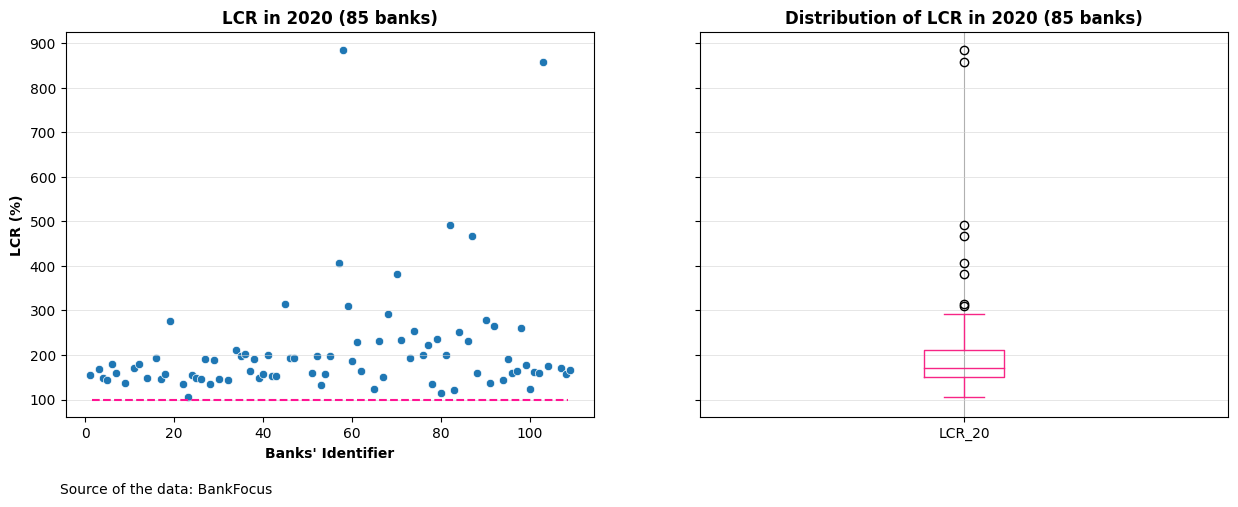

In [ ]:
line_plot_boxplot2(lcr_df_20_na, lcr_20, 2020)

In [ ]:
outlier_lcr_2020 = outliers_lcr('20')

<ipython-input-64-572040db31be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019',


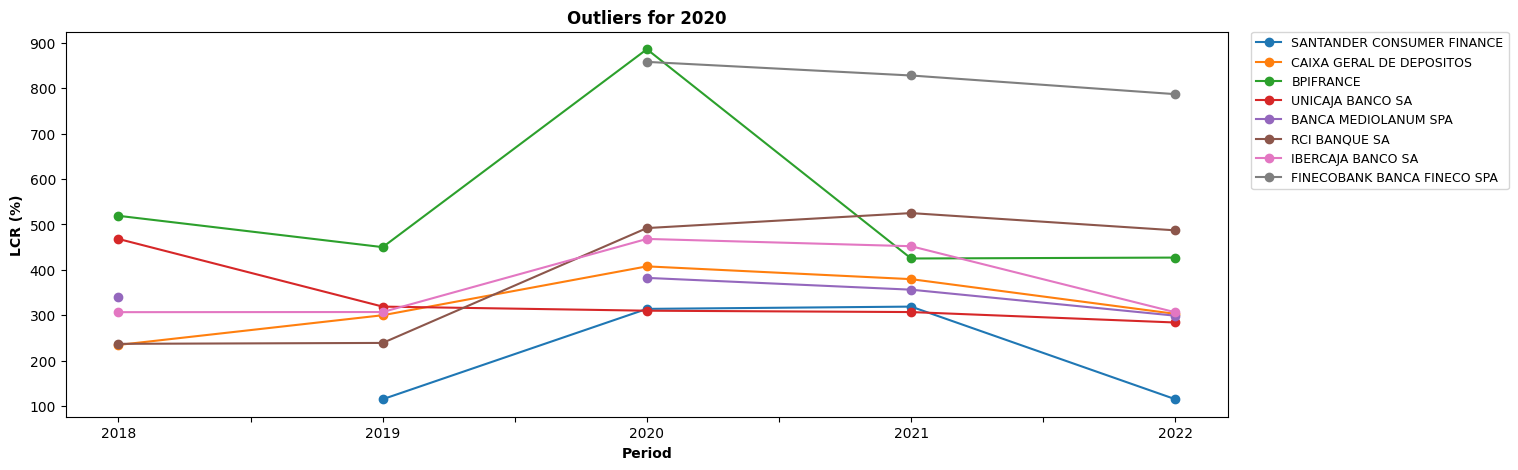

In [ ]:
lcr_2020 = prepare_for_plot_lcr(outlier_lcr_2020)
lcr_2020.plot(marker='o')
plt.title('Outliers for 2020', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=9)

Again we see that the variation has decreased a lot after the removal of the outliers and by looking at this graph (since the scale has decreased) we see that in the sample for 2020 there seems to be no bank that has not satisfied the minimum value for the LCR ratio and the mean has increased to 177.741039% but also the standard deviation has increased to 40.90452814286662.


### **2021**

**For the year 2021 we see 85 banks with LCR not missing within our sample. **

In [ ]:
lcr_21 = data_object[['Company', 'Country', 'LCR_21']]
lcr_df_21_na = lcr_21.dropna(axis = 'rows')
lcr_df_21_na.shape

(85, 3)

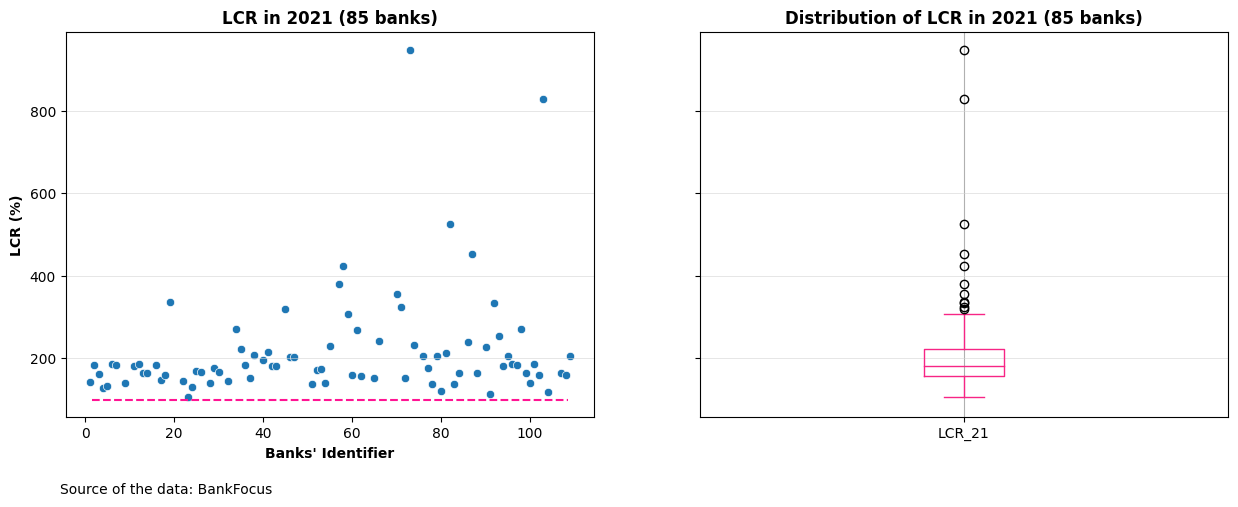

In [ ]:
line_plot_boxplot2(lcr_df_21_na, lcr_21, 2021)

In [ ]:
outlier_lcr_2021 = outliers_lcr('21')

<ipython-input-64-572040db31be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019',


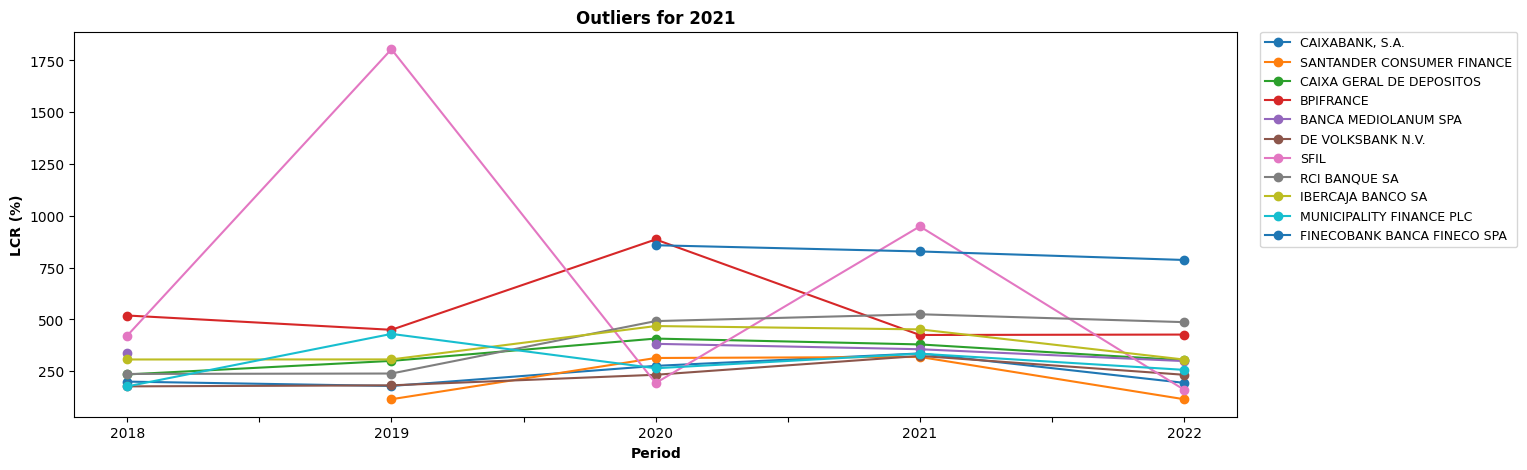

In [ ]:
lcr_2021 = prepare_for_plot_lcr(outlier_lcr_2021)
lcr_2021.plot(marker='o')
plt.title('Outliers for 2021', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=9)

Similar to 2020 we see that that there seems to be no bank that does not satisfy the regularoty min for the LCR ratio in our sample for 2021. Additionally we see that the mean and the stadard deviation for the elemnts of the sample that are not considered extreme outliers is almost the same as the one for 2020.


### **2022**

For 2022 we see that the banks with no missing LCR ratio within the sample are 87.

In [ ]:
lcr_22 = data_object[['Company', 'Country', 'LCR_22']]
lcr_df_22_na = lcr_22.dropna(axis = 'rows')
lcr_df_22_na.shape

(87, 3)

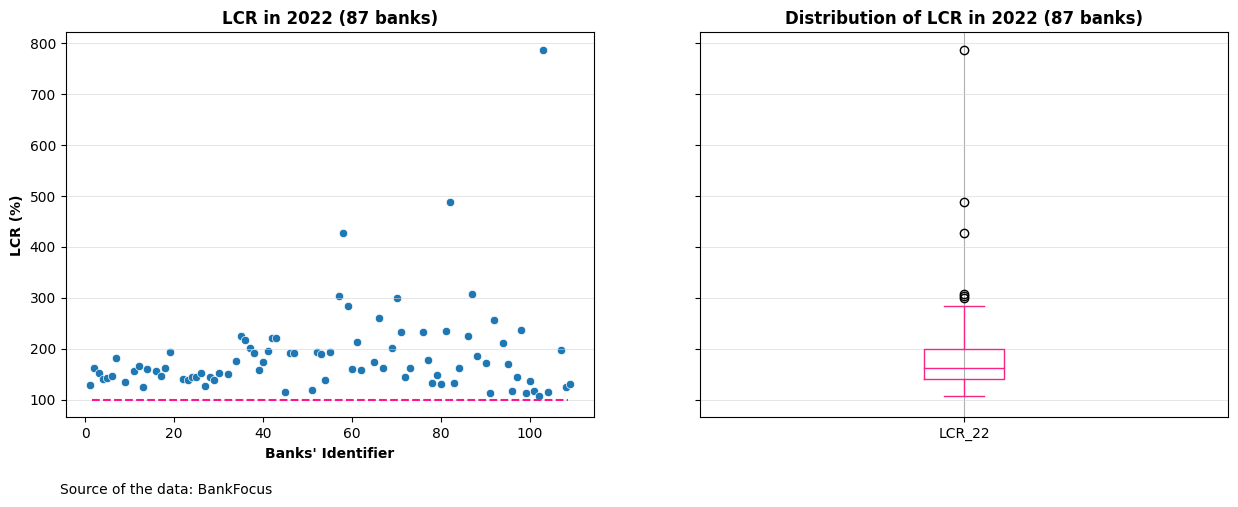

In [ ]:
line_plot_boxplot2(lcr_df_22_na, lcr_22, 2022)

In [ ]:
outlier_lcr_2022 = outliers_lcr('22')

<ipython-input-64-572040db31be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019',


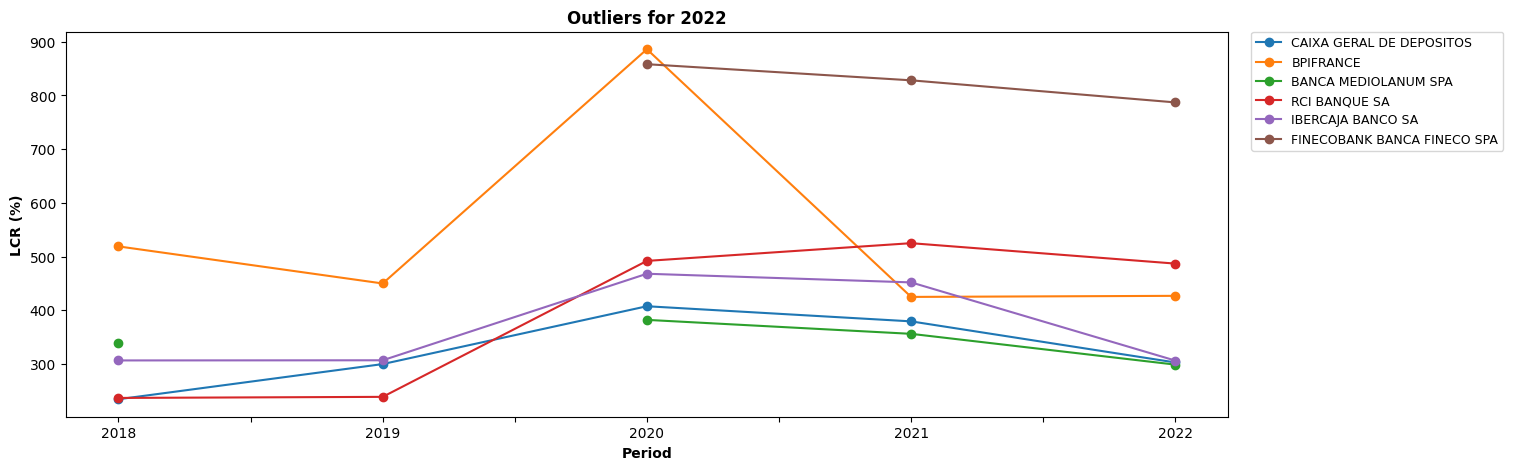

In [ ]:
lcr_2022 = prepare_for_plot_lcr(outlier_lcr_2022)
lcr_2022.plot(marker='o')
plt.title('Outliers for 2022', fontweight = 'bold', fontsize = 12)
plt.xlabel('Period', fontweight = 'bold', fontsize = 10)
plt.ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=9)

Similar to the previous years, we see no banks that do not satisy the regulatory min for the LCR ratio and we see a slight decerase in the mean value and even a slighter decrease in the standard deviation. Nevertheless the behaviour is similar to the years before 2022.

## *2.3. COUNTRY*

Let's consider the average of Liquidity Coverage Ratio across **countries** in the Euro - Area, where companies are domiciled.

In [ ]:
# create the dataset with LCR by country
lcr_by_country = lcr_only_df.groupby(by = lcr_df['Country']).mean()
lcr_by_country = lcr_by_country.iloc[:, ::1]
lcr_by_country = lcr_by_country.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
lcr_by_country

2018        2019        2020        2021        2022
Country                                                                
Austria      154.366667  144.666667  194.766667  189.786667  188.333333
Belgium      157.070000  163.262000  166.564000  173.854000  168.000000
Finland      181.000000  298.100000  211.200000  247.450000  209.350000
France       179.046667  269.740000  236.041333  253.850667  181.446667
Germany      153.836000  161.922000  176.860000  171.290000  163.070000
Greece       198.300000  207.300000  232.200000  242.000000  259.200000
Ireland      132.000000  147.500000  172.957500  192.000000  206.500000
Italy        167.621667  165.555000  200.633333  187.300000  188.383333
Luxembourg   115.000000  118.000000  115.000000  120.400000  130.300000
Netherlands  152.500000  149.750000  173.942500  205.250000  178.000000
Portugal     173.720000  197.460000  232.740000  248.140000  218.900000
Spain        222.140000  198.824286  252.458571  267.577143  216.202857

In [ ]:
lcr_100 = lcr[(lcr['LCR_18'] > 100) & (lcr['LCR_19'] > 100) & (lcr['LCR_20'] > 100) & (lcr['LCR_21'] > 100) & (lcr['LCR_22'] > 100)]

# drop rows with NaN
lcr100_df = lcr_100.dropna(axis = 'rows')

lcr100_df.shape

(63, 12)

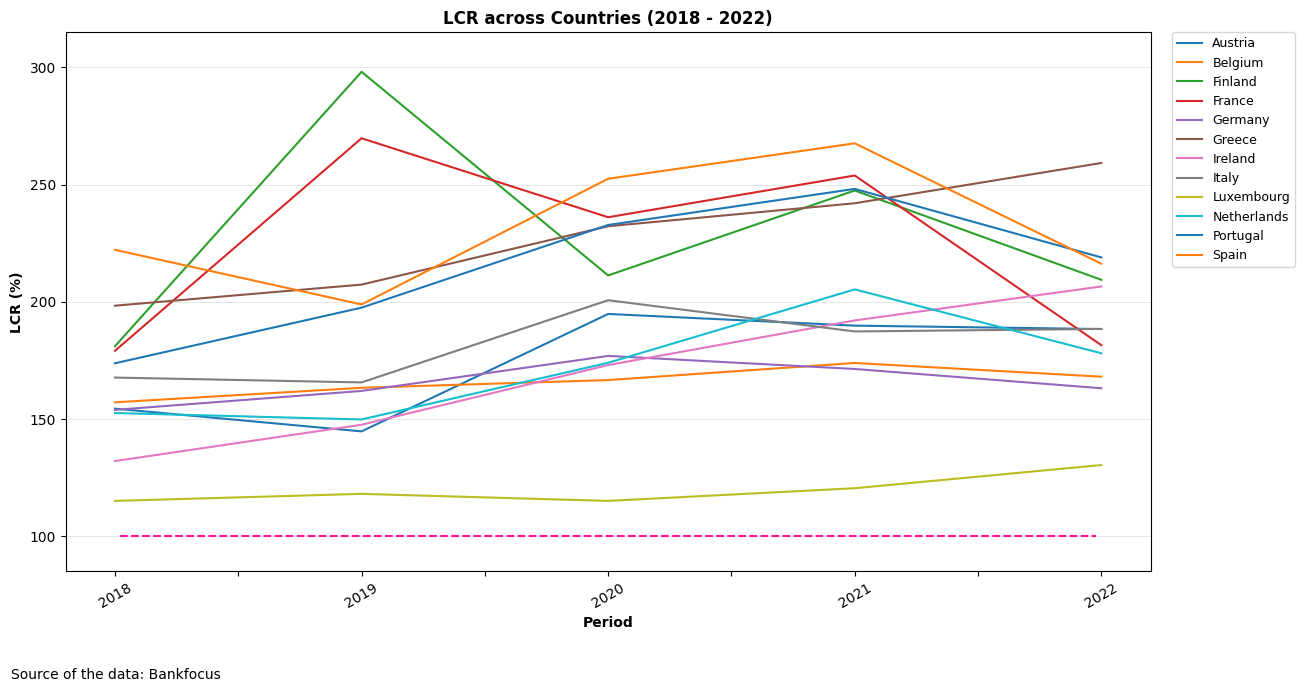

In [ ]:
# COUNTRY
pl = lcr_by_country.T.plot(rot = 30, figsize = (14, 7))
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0., fontsize=9)
pl.set_title('LCR across Countries (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('LCR (%)', fontweight = 'bold', fontsize = 10)
plt.ylim(85, 315)
pl.text(-0.05, -0.2, 'Source of the data: Bankfocus', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

Inspecting the graph by considering only the *12* countries in which banks show the available data for the entire period, we can infer that all the *63* observations of the sample satisfy the requirement **LCR > 100%**.

With the objective of evaluating the situaution from a micro point of view, we separate each country into a graph:

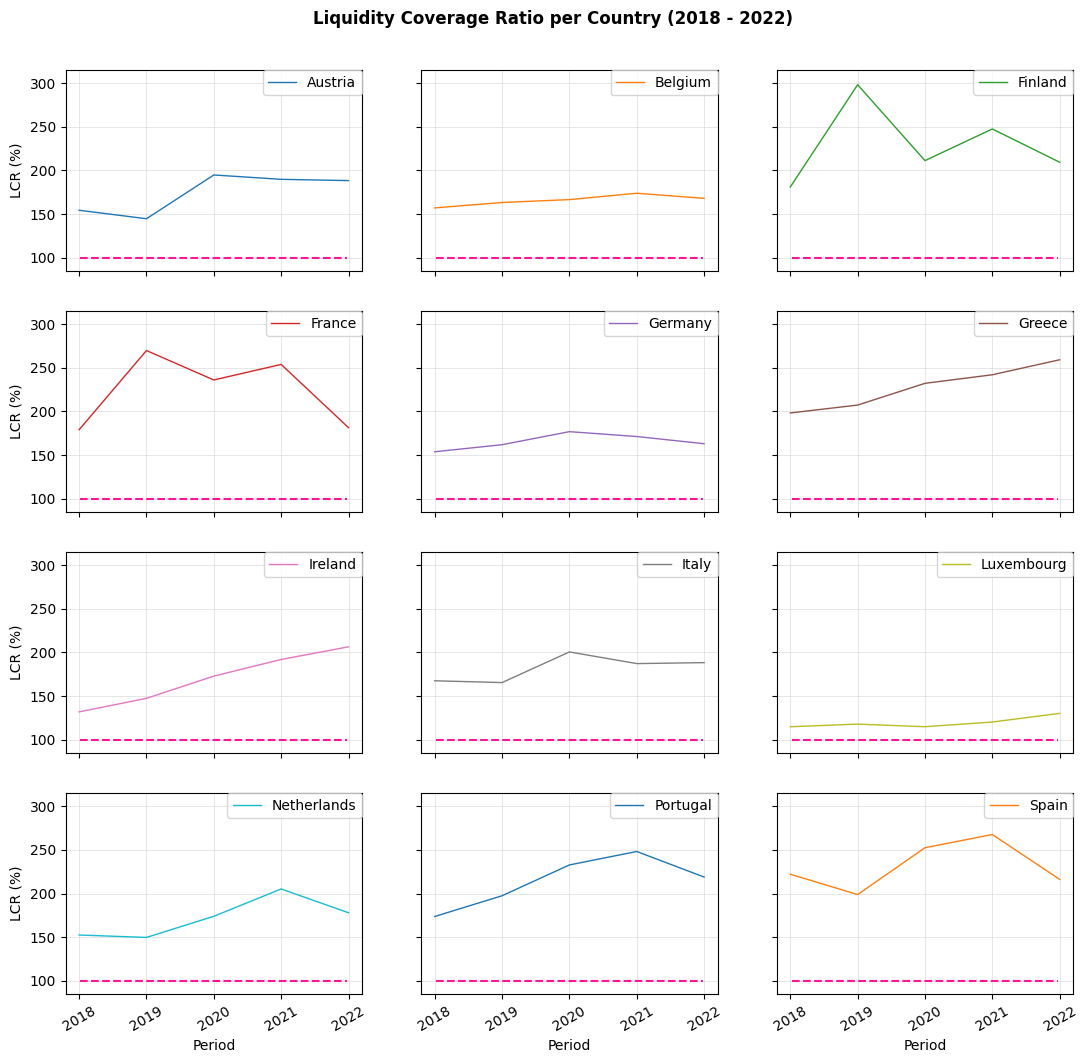

In [ ]:
# EACH COUNTRY
lcr_by_country.T.plot(subplots = True, layout = (4, 3), figsize = (13, 12), sharey = True,
                    rot = 30,  ylabel = 'LCR (%)', xlabel = 'Period', linewidth = 1)
plt.gcf().suptitle('Liquidity Coverage Ratio per Country (2018 - 2022)', fontsize = 12, fontweight = 'bold', y = 0.93)

for ax in plt.gcf().axes:
    ax.legend(loc = 'best', borderaxespad = 0)
    ax.grid(color = 'lightgrey', linewidth = 0.4)
    ax.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
    plt.ylim(85, 315)

# **3. MERGE**

In [ ]:
nsfr_for_lcr = data_object[data_object['NSFR_18'].notna()]
nsfr_for_lcr = nsfr_for_lcr[nsfr_for_lcr['NSFR_19'].notna()]
nsfr_for_lcr = nsfr_for_lcr[nsfr_for_lcr['NSFR_20'].notna()]
nsfr_for_lcr = nsfr_for_lcr[nsfr_for_lcr['NSFR_21'].notna()]
nsfr_for_lcr = nsfr_for_lcr[nsfr_for_lcr['NSFR_22'].notna()]
nsfr_for_lcr = nsfr_for_lcr[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]

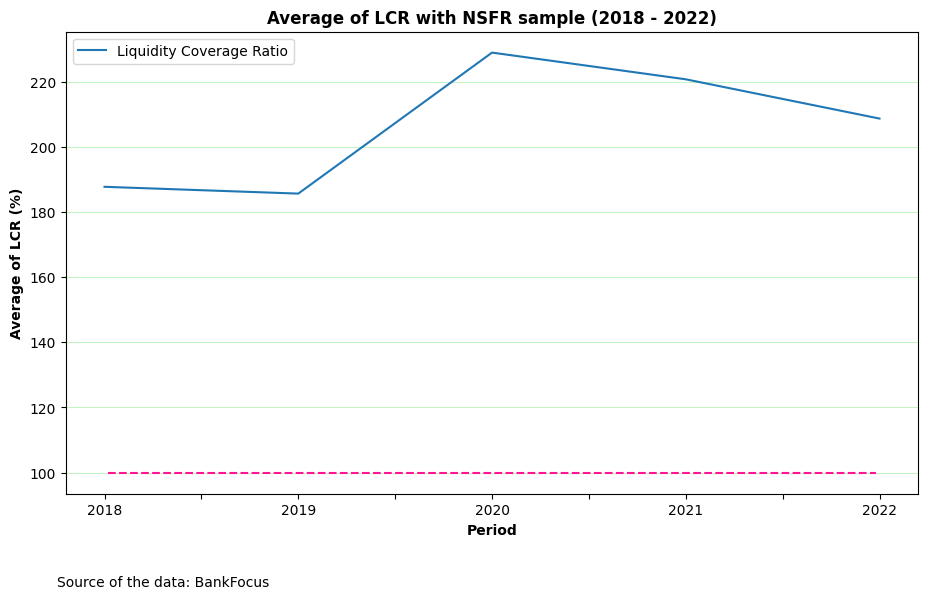

In [ ]:
nsfr_for_lcr = nsfr_for_lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})
pl = nsfr_for_lcr.mean().T.plot(figsize = (11, 6))
pl.set_title('Average of LCR with NSFR sample (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.set_ylabel('Average of LCR (%)', fontweight = 'bold', fontsize = 10)
pl.legend(['Liquidity Coverage Ratio'], frameon = True, loc = 'upper left')
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
pl.text(-0.01, -0.2, 'Source of the data: BankFocus', transform = pl.transAxes)
plt.grid(axis = 'y', color = 'lightgreen', linewidth = 0.4)

In [ ]:
merge = pd.merge(nsfr_df, lcr_df)
#merge = merge[['Company', 'Country', 'NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22', 'LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
merge.shape

(28, 17)

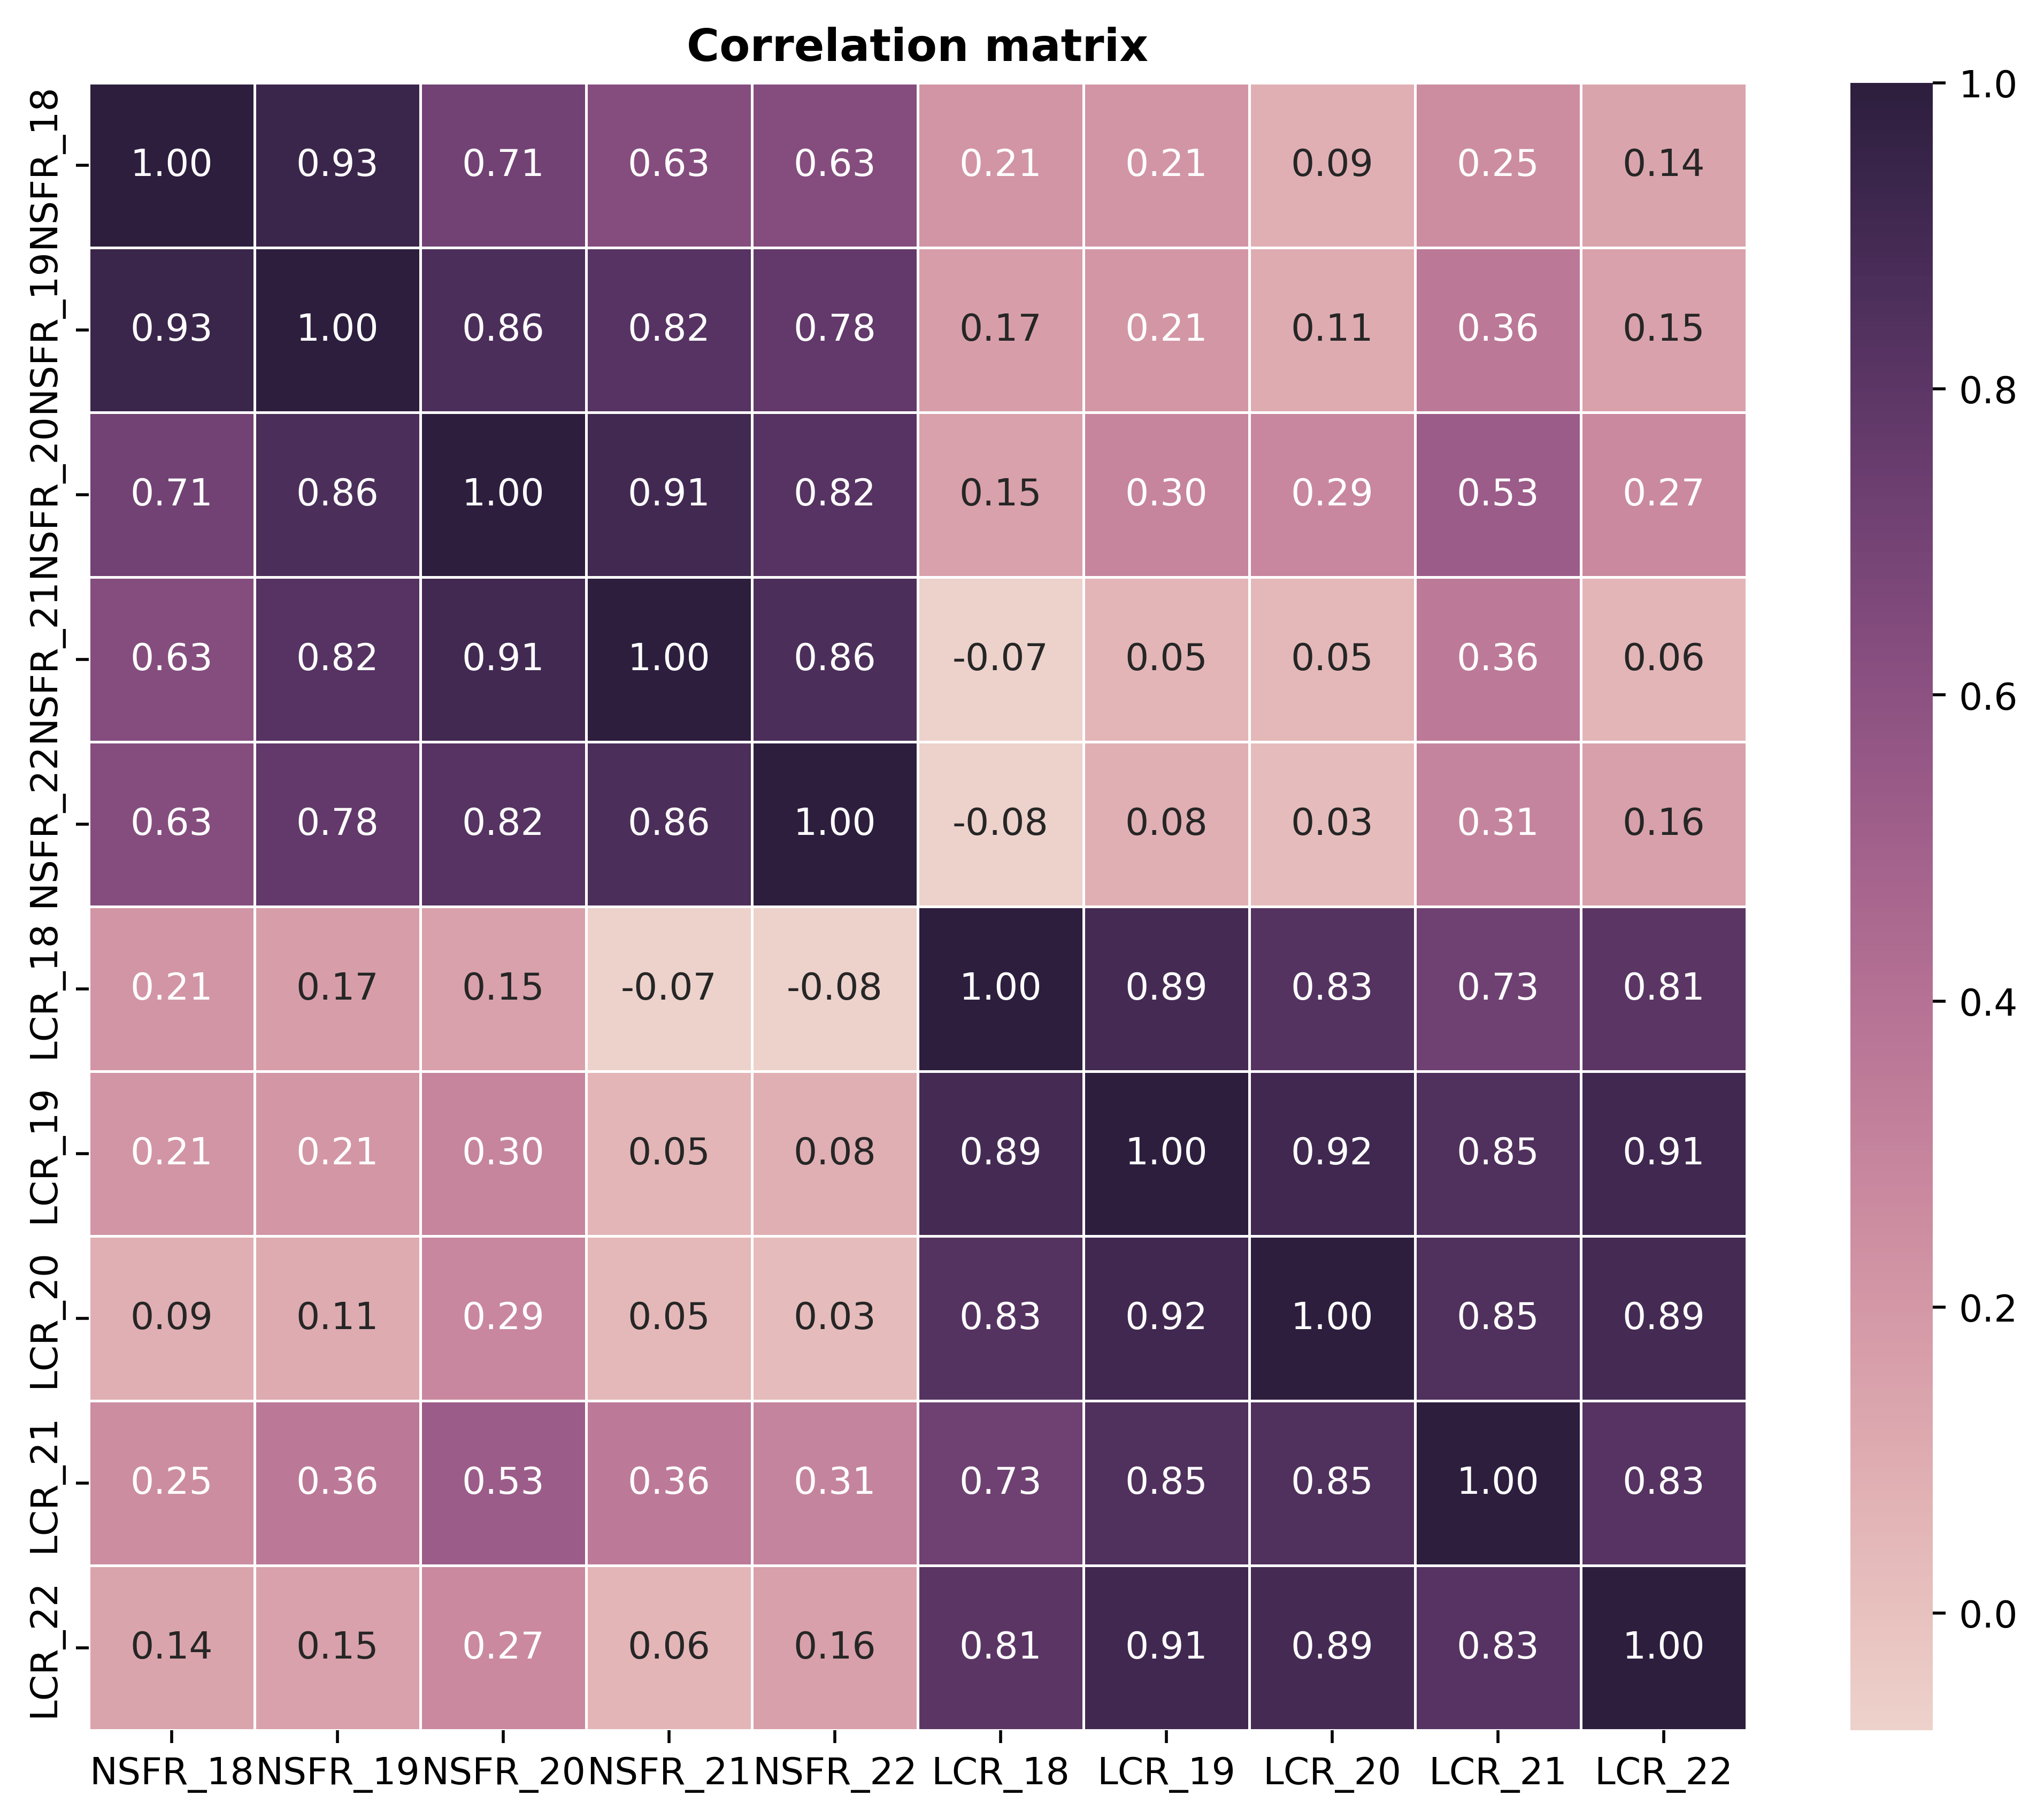

In [ ]:
corr = merge[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22','LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22' ]].corr(method = 'pearson')
plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(corr ,annot=True,fmt=".2f", linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Correlation matrix', fontweight = 'bold', fontsize = 12)
plt.show()

In [ ]:
# Creating the Quartiles for years
%matplotlib inline
rcParams['figure.figsize'] = 12,8

#First quartile of elements for the sample according to total assets
Quart1_2018 = merge[(merge['TotAss_18']>=30000) & (merge['TotAss_18']<=50000)]
Quart1_2019 = merge[(merge['TotAss_19']>=30000) & (merge['TotAss_19']<=50000)]
Quart1_2020 = merge[(merge['TotAss_20']>=30000) & (merge['TotAss_20']<=50000)]
Quart1_2021 = merge[(merge['TotAss_21']>=30000) & (merge['TotAss_21']<=50000)]
Quart1_2022 = merge[(merge['TotAss_22']>=30000) & (merge['TotAss_22']<=50000)]

#Second quartile of elements for the sample according to total assets
Quart2_2018 = merge[(merge['TotAss_18']>=50000) & (merge['TotAss_18']<=75000)]
Quart2_2019 = merge[(merge['TotAss_19']>=50000) & (merge['TotAss_19']<=75000)]
Quart2_2020 = nsfr_df[(nsfr_df['TotAss_20']>=50000) & (nsfr_df['TotAss_20']<=75000)]
Quart2_2021 = nsfr_df[(nsfr_df['TotAss_21']>=50000) & (nsfr_df['TotAss_21']<=75000)]
Quart2_2022 = nsfr_df[(nsfr_df['TotAss_22']>=50000) & (nsfr_df['TotAss_22']<=75000)]

#Third quartile of elements for the sample according to total assets
Quart3_2018 = nsfr_df[(nsfr_df['TotAss_18']>=75000) & (nsfr_df['TotAss_18']<=100000)]
Quart3_2019 = nsfr_df[(nsfr_df['TotAss_19']>=75000) & (nsfr_df['TotAss_19']<=100000)]
Quart3_2020 = nsfr_df[(nsfr_df['TotAss_20']>=75000) & (nsfr_df['TotAss_20']<=100000)]
Quart3_2021 = nsfr_df[(nsfr_df['TotAss_21']>=75000) & (nsfr_df['TotAss_21']<=100000)]
Quart3_2022 = nsfr_df[(nsfr_df['TotAss_22']>=75000) & (nsfr_df['TotAss_22']<=100000)]

#Forth quartile of elements for the sample according to total assets
Quart4_2018 = nsfr_df[(nsfr_df['TotAss_18']>=100000) & (nsfr_df['TotAss_18']<=150000)]
Quart4_2019 = nsfr_df[(nsfr_df['TotAss_19']>=100000) & (nsfr_df['TotAss_19']<=150000)]
Quart4_2020 = nsfr_df[(nsfr_df['TotAss_20']>=100000) & (nsfr_df['TotAss_20']<=150000)]
Quart4_2021 = nsfr_df[(nsfr_df['TotAss_21']>=100000) & (nsfr_df['TotAss_21']<=150000)]
Quart4_2022 = nsfr_df[(nsfr_df['TotAss_22']>=100000) & (nsfr_df['TotAss_22']<=150000)]

#Fifth quartile of elements for the sample according to total assets
Quart5_2018 = nsfr_df[(nsfr_df['TotAss_18']>=150000) & (nsfr_df['TotAss_18']<=300000)]
Quart5_2019 = nsfr_df[(nsfr_df['TotAss_19']>=150000) & (nsfr_df['TotAss_19']<=300000)]
Quart5_2020 = nsfr_df[(nsfr_df['TotAss_20']>=150000) & (nsfr_df['TotAss_20']<=300000)]
Quart5_2021 = nsfr_df[(nsfr_df['TotAss_21']>=150000) & (nsfr_df['TotAss_21']<=300000)]
Quart5_2022 = nsfr_df[(nsfr_df['TotAss_22']>=150000) & (nsfr_df['TotAss_22']<=300000)]

#Sixth quartile of elements for the sample according to total assets
Quart6_2018 = nsfr_df[(nsfr_df['TotAss_18']>=300000) & (nsfr_df['TotAss_18']<=500000)]
Quart6_2019 = nsfr_df[(nsfr_df['TotAss_19']>=300000) & (nsfr_df['TotAss_19']<=500000)]
Quart6_2020 = nsfr_df[(nsfr_df['TotAss_20']>=300000) & (nsfr_df['TotAss_20']<=500000)]
Quart6_2021 = nsfr_df[(nsfr_df['TotAss_21']>=300000) & (nsfr_df['TotAss_21']<=500000)]
Quart6_2022 = nsfr_df[(nsfr_df['TotAss_22']>=300000) & (nsfr_df['TotAss_22']<=500000)]

#Seventh quartile of elements for the sample according to total assets
Quart7_2018 = nsfr_df[(nsfr_df['TotAss_18']>=500000) & (nsfr_df['TotAss_18']<=1000000)]
Quart7_2019 = nsfr_df[(nsfr_df['TotAss_19']>=500000) & (nsfr_df['TotAss_19']<=1000000)]
Quart7_2020 = nsfr_df[(nsfr_df['TotAss_20']>=500000) & (nsfr_df['TotAss_20']<=1000000)]
Quart7_2021 = nsfr_df[(nsfr_df['TotAss_21']>=500000) & (nsfr_df['TotAss_21']<=1000000)]
Quart7_2022 = nsfr_df[(nsfr_df['TotAss_22']>=500000) & (nsfr_df['TotAss_22']<=1000000)]

#Eighth quartile of elements for the sample according to total assets
Quart8_2018 = nsfr_df[(nsfr_df['TotAss_18']>1000000)]
Quart8_2019 = nsfr_df[(nsfr_df['TotAss_19']>1000000)]
Quart8_2020 = nsfr_df[(nsfr_df['TotAss_20']>1000000)]
Quart8_2021 = nsfr_df[(nsfr_df['TotAss_21']>1000000)]
Quart8_2022 = nsfr_df[(nsfr_df['TotAss_22']>1000000)]

In [ ]:
bpifrance = merge[merge['Company'] == 'BPIFRANCE']
bpifrance_nsfr = bpifrance[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
bpifrance_nsfr = bpifrance_nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
bpifrance_lcr = bpifrance[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
bpifrance_lcr = bpifrance_lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})

frames = [bpifrance_nsfr, bpifrance_lcr]

union = pd.concat(frames)
union

2018   2019    2020   2021   2022
18  118.0  114.0  132.84  122.0  117.0
18  519.0  450.0  885.96  425.0  427.0

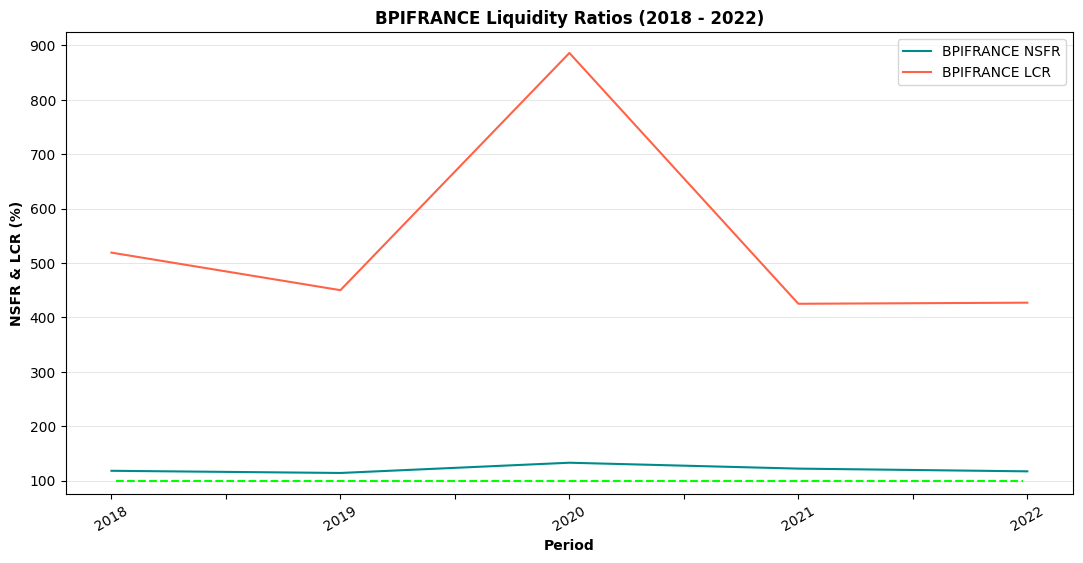

In [ ]:
pl = union.T.plot(color = ('darkcyan', 'tomato'), rot = 30, figsize = (13, 6))
pl.set_title('BPIFRANCE Liquidity Ratios (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
pl.set_ylabel('NSFR & LCR (%)', fontweight = 'bold', fontsize = 10)
#plt.ylim(55, 910)
pl.legend(['BPIFRANCE NSFR', 'BPIFRANCE LCR'], frameon = True, loc = 'upper right')
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

In [ ]:
santander = merge[merge['Company'] == 'BANCO SANTANDER SA']
santander_nsfr = santander[['NSFR_18', 'NSFR_19', 'NSFR_20', 'NSFR_21', 'NSFR_22']]
santander_nsfr = santander_nsfr.rename(columns = {'NSFR_18': '2018', 'NSFR_19': '2019', 'NSFR_20': '2020', 'NSFR_21': '2021', 'NSFR_22': '2022'})
santander_lcr = santander[['LCR_18', 'LCR_19', 'LCR_20', 'LCR_21', 'LCR_22']]
santander_lcr = santander_lcr.rename(columns = {'LCR_18': '2018', 'LCR_19': '2019', 'LCR_20': '2020', 'LCR_21': '2021', 'LCR_22': '2022'})

frames = [santander_nsfr, santander_lcr]

union = pd.concat(frames)
union

2018   2019   2020   2021   2022
0  114.0  112.0  120.0  126.0  121.0
0  158.0  147.0  168.0  163.0  152.0

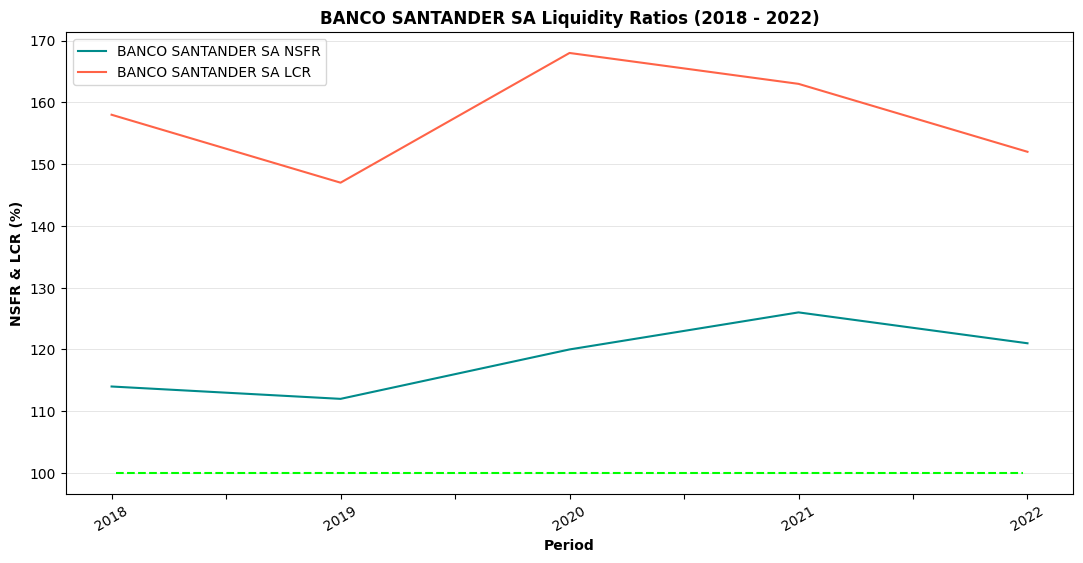

In [ ]:
pl = union.T.plot(color = ('darkcyan', 'tomato'), rot = 30, figsize = (13, 6))
pl.set_title('BANCO SANTANDER SA Liquidity Ratios (2018 - 2022)', fontweight = 'bold', fontsize = 12)
pl.set_xlabel('Period', fontweight = 'bold', fontsize = 10)
pl.axhline(y = 100, xmin = 0.05, xmax = 0.95, color = "lime", linewidth = 1.5, linestyle = 'dashed')
pl.set_ylabel('NSFR & LCR (%)', fontweight = 'bold', fontsize = 10)
#plt.ylim(55, 910)
pl.legend(['BANCO SANTANDER SA NSFR', 'BANCO SANTANDER SA LCR'], frameon = True, loc = 'upper left')
plt.grid(axis = 'y', color = 'lightgrey', linewidth = 0.4)

# **4. Euro Area Members Generic Analysis**


We tertirved some data from the CBD2 dataset from the SDW of the ECB regarding the Net Stable Funding ratio with the scope of getting a snapshot of the general situation in the euro area in terms of the long term regulatory matric.

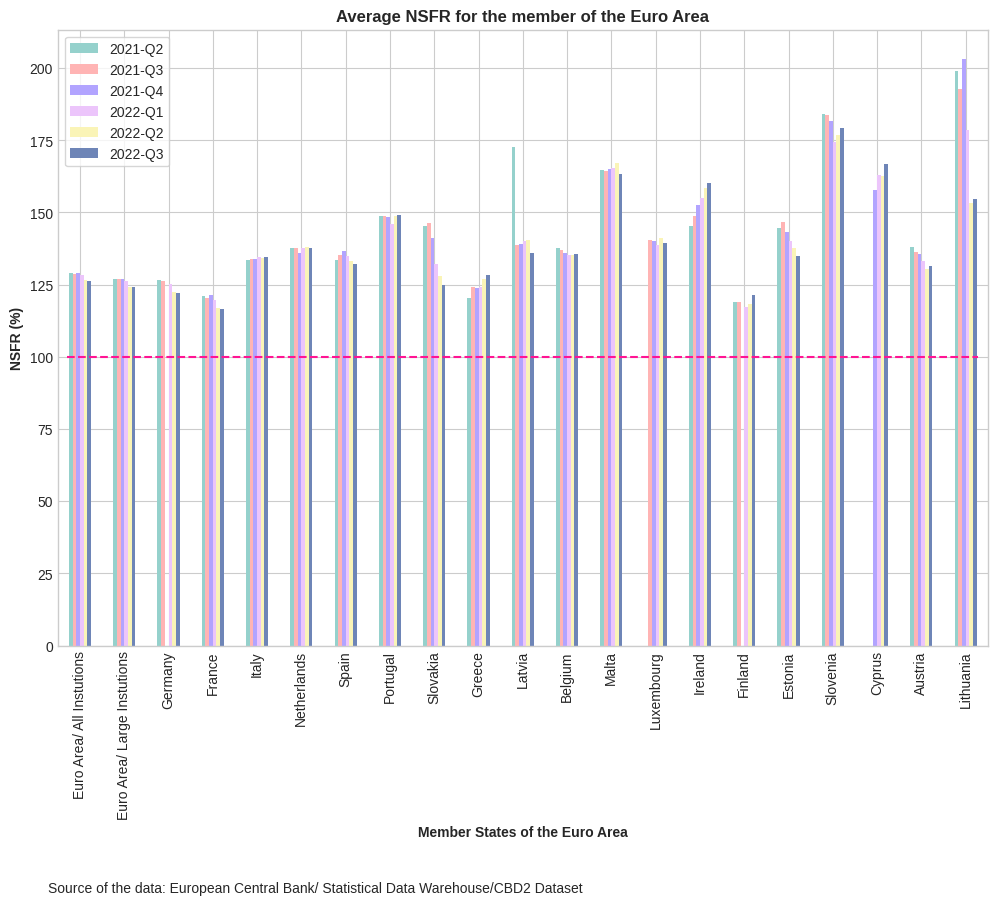

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=12,8
pl = data_euro_area21_22.plot(kind='bar', x='Member', rot = 90, color = ['#95D1CC', '#FFB4B4', "#B2A4FF", "#ECC5FB", '#FAF4B7', '#6E85B7'])
pl.set_ylabel("NSFR (%)",fontsize=10, fontweight='bold')
pl.set_xlabel("Member States of the Euro Area",fontsize=10, fontweight='bold')
pl.set_title("Average NSFR for the member of the Euro Area", fontweight='bold', fontsize=12)
pl.axhline(y = 100, xmin = 0.01, xmax = 0.99, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
pl.text(-0.01, -0.4,'Source of the data: European Central Bank/ Statistical Data Warehouse/CBD2 Dataset', transform = pl.transAxes)
pl.legend(frameon = True)

<ipython-input-98-ccd53a20ff22>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-98-ccd53a20ff22>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pl.mean().plot(ax = ax, label='Euro Area/ All Institutions')
<ipython-input-98-ccd53a20ff22>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of nu

Text(0.5, 1.0, 'NSFR Euro Area: Large vs All Institutions')

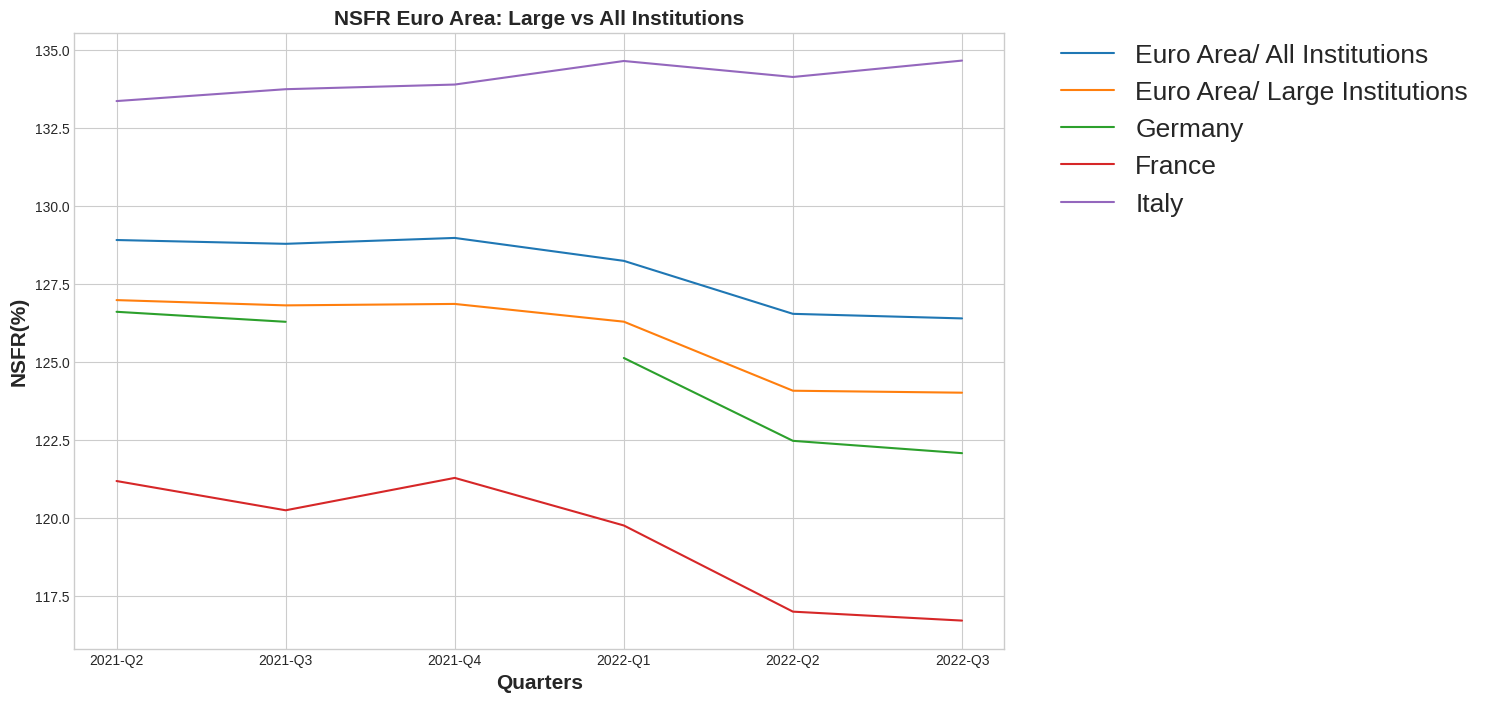

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=12,8

pl=data_euro_area21_22[data_euro_area21_22['Member']=='Euro Area/ All Instutions']
pl_1=data_euro_area21_22[data_euro_area21_22['Member']=='Euro Area/ Large Instutions']
pl_2=data_euro_area21_22[data_euro_area21_22['Member']=='Germany']
pl_3=data_euro_area21_22[data_euro_area21_22['Member']=='France']
pl_4=data_euro_area21_22[data_euro_area21_22['Member']=='Italy']

plt.style.use('seaborn-whitegrid')

fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
pl.mean().plot(ax = ax, label='Euro Area/ All Institutions')
pl_1.mean().plot(ax = ax, label='Euro Area/ Large Institutions')
pl_2.mean().plot(ax = ax, label='Germany')
pl_3.mean().plot(ax = ax, label='France')
pl_4.mean().plot(ax = ax, label='Italy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=19)
ax.set_xlabel('Quarters', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('NSFR(%)' , fontweight = 'bold', fontsize = 15)
ax.set_title('NSFR Euro Area: Large vs All Institutions', fontweight = 'bold', fontsize = 15)

<ipython-input-99-e786ada224c6>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-99-e786ada224c6>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pl.mean().plot(ax = ax, label='Greece')
<ipython-input-99-e786ada224c6>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence 

Text(0.5, 1.0, 'NSFR Euro Area: Large Institutions & Member States')

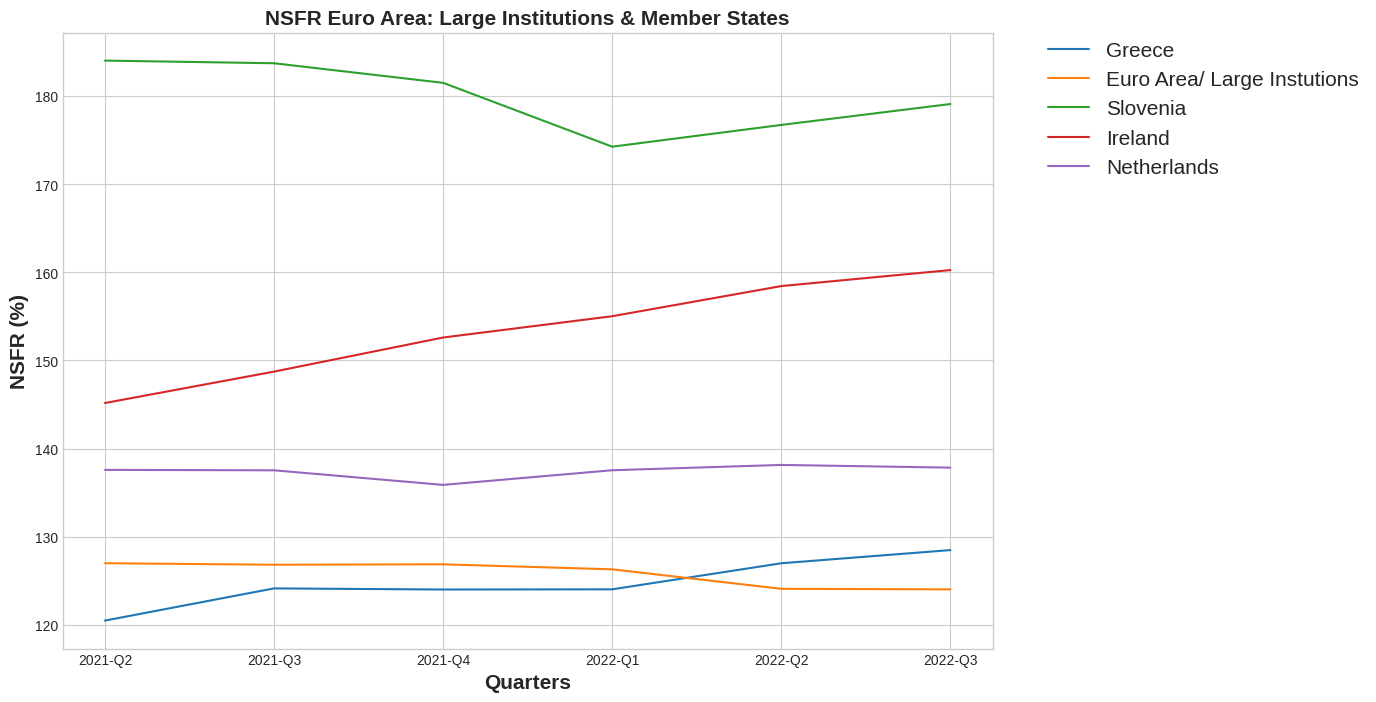

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=12,8
pl=data_euro_area21_22[data_euro_area21_22['Member']=='Greece']
pl_1=data_euro_area21_22[data_euro_area21_22['Member']=='Euro Area/ Large Instutions']
pl_2=data_euro_area21_22[data_euro_area21_22['Member']=='Slovenia']
pl_3=data_euro_area21_22[data_euro_area21_22['Member']=='Ireland']
pl_4=data_euro_area21_22[data_euro_area21_22['Member']=='Netherlands']

plt.style.use('seaborn-whitegrid')

fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
pl.mean().plot(ax = ax, label='Greece')
pl_1.mean().plot(ax = ax, label='Euro Area/ Large Instutions')
pl_2.mean().plot(ax = ax, label='Slovenia')
pl_3.mean().plot(ax = ax, label='Ireland')
pl_4.mean().plot(ax = ax, label='Netherlands')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
ax.set_xlabel('Quarters', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('NSFR (%)' , fontweight = 'bold', fontsize = 15)
ax.set_title('NSFR Euro Area: Large Institutions & Member States', fontweight = 'bold', fontsize = 15)

Text(-0.01, -0.2, 'Source of the data: European Central Bank/ Statistical Data Warehouse/CBD2 Dataset')

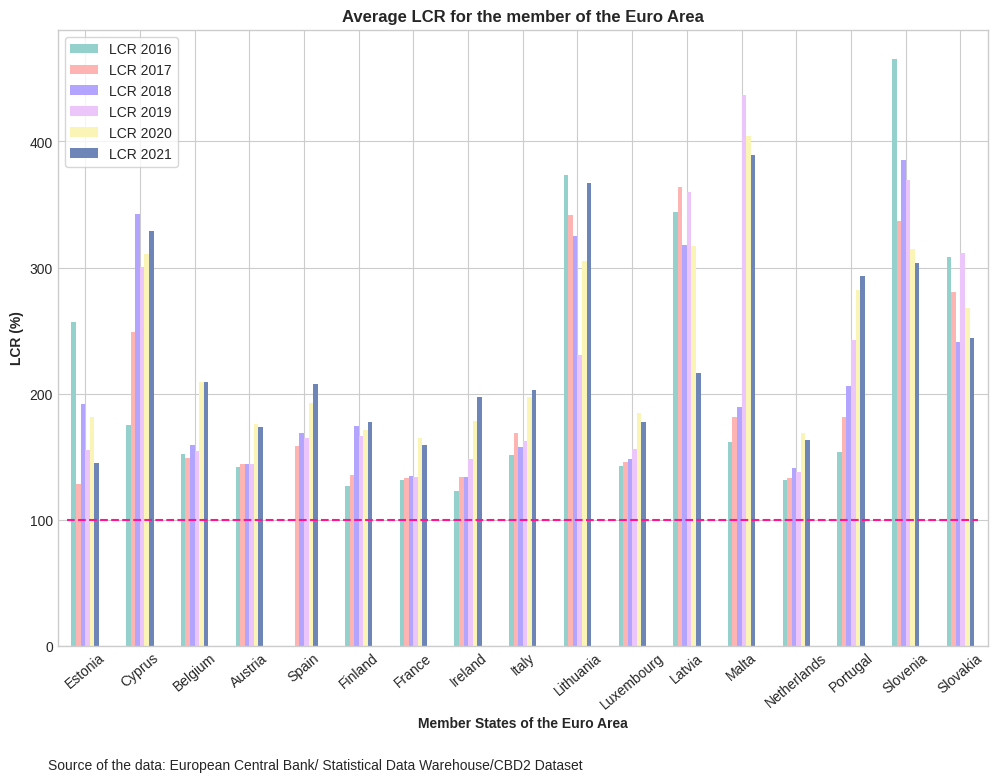

In [ ]:
u=lcr_euro_area.plot(kind = 'bar', x = 'Member State', rot = 40, color = ['#95D1CC', '#FFB4B4', "#B2A4FF", "#ECC5FB", '#FAF4B7', '#6E85B7'])
plt.legend(frameon = True, loc = 'upper left')
plt.axhline(y = 100, xmin = 0.01, xmax = 0.99, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')
plt.ylabel("LCR (%)",fontsize=10, fontweight='bold')
plt.xlabel("Member States of the Euro Area",fontsize=10, fontweight='bold')
plt.title("Average LCR for the member of the Euro Area", fontweight='bold', fontsize=12)
plt.text(-0.01, -0.2,'Source of the data: European Central Bank/ Statistical Data Warehouse/CBD2 Dataset', transform = u.transAxes)
# Missing countries: Germany and Greece due to missing data

<ipython-input-105-9e8f87507f38>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-105-9e8f87507f38>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pl.rename(columns = {'LCR 2016':'2016', 'LCR 2017':'2017','LCR 2018':'2018','LCR 2019':'2019','LCR 2020':'2020','LCR 2021':'2021'}, inplace = True)
<ipython-input-105-9e8f87507f38>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

Text(0.5, 1.0, 'LCR (2016 - 2021)')

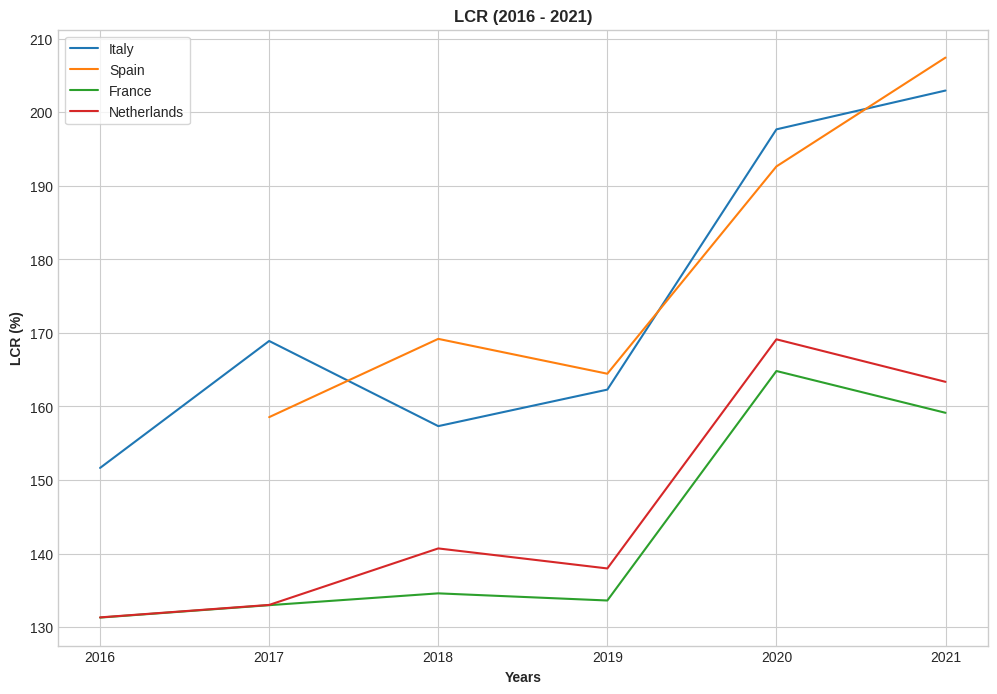

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=12,8

plt.style.use('seaborn-whitegrid')

pl = lcr_euro_area[lcr_euro_area['Member State']=='Italy']
pl_1 = lcr_euro_area[lcr_euro_area['Member State']=='Spain']
pl_2 = lcr_euro_area[lcr_euro_area['Member State']=='France']
pl_3 = lcr_euro_area[lcr_euro_area['Member State']=='Netherlands']

pl.rename(columns = {'LCR 2016':'2016', 'LCR 2017':'2017','LCR 2018':'2018','LCR 2019':'2019','LCR 2020':'2020','LCR 2021':'2021'}, inplace = True)
pl_1.rename(columns = {'LCR 2016':'2016', 'LCR 2017':'2017','LCR 2018':'2018','LCR 2019':'2019','LCR 2020':'2020','LCR 2021':'2021'}, inplace = True)
pl_2.rename(columns = {'LCR 2016':'2016', 'LCR 2017':'2017','LCR 2018':'2018','LCR 2019':'2019','LCR 2020':'2020','LCR 2021':'2021'}, inplace = True)
pl_3.rename(columns = {'LCR 2016':'2016', 'LCR 2017':'2017','LCR 2018':'2018','LCR 2019':'2019','LCR 2020':'2020','LCR 2021':'2021'}, inplace = True)
pl_4.rename(columns = {'LCR 2016':'2016', 'LCR 2017':'2017','LCR 2018':'2018','LCR 2019':'2019','LCR 2020':'2020','LCR 2021':'2021'}, inplace = True)

fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
pl.mean().plot(ax = ax, label='Italy')
pl_1.mean().plot(ax = ax, label='Spain')
pl_2.mean().plot(ax = ax, label='France')
pl_3.mean().plot(ax = ax, label='Netherlands')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
plt.legend(frameon = True)
ax.set_xlabel('Years', fontweight = 'bold', fontsize = 10)
ax.set_ylabel('LCR (%)' , fontweight = 'bold', fontsize = 10)
ax.set_title('LCR (2016 - 2021)', fontweight = 'bold', fontsize = 12)

<ipython-input-102-5d77d0cb4fc6>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-102-5d77d0cb4fc6>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pl.mean().plot(ax = ax, label='Portugal', fontsize=15)
<ipython-input-102-5d77d0cb4fc6>:15: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeri

Text(0.5, 1.0, 'LCR 2016-2021')

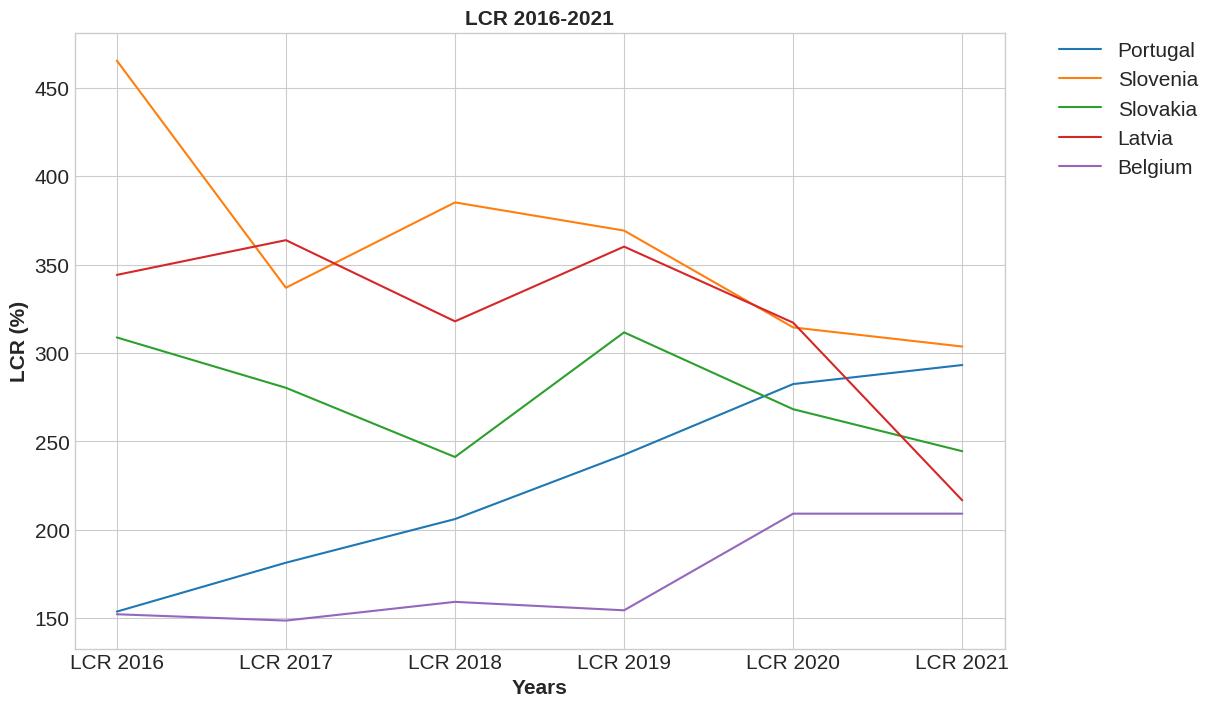

In [ ]:
plt.style.use('seaborn-whitegrid')


pl=lcr_euro_area[lcr_euro_area['Member State']=='Portugal']
pl_1=lcr_euro_area[lcr_euro_area['Member State']=='Slovenia']
pl_2=lcr_euro_area[lcr_euro_area['Member State']=='Slovakia']
pl_3=lcr_euro_area[lcr_euro_area['Member State']=='Latvia']
pl_4=lcr_euro_area[lcr_euro_area['Member State']=='Belgium']


fix, ax = plt.subplots() # Create the figure and axes object

# Plot the first x and y axes:
pl.mean().plot(ax = ax, label='Portugal', fontsize=15)
pl_1.mean().plot(ax = ax, label='Slovenia')
pl_2.mean().plot(ax = ax, label='Slovakia')
pl_3.mean().plot(ax = ax, label='Latvia')
pl_4.mean().plot(ax = ax, label='Belgium')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=15)
ax.set_xlabel('Years', fontweight = 'bold', fontsize = 15)
ax.set_ylabel('LCR (%)' , fontweight = 'bold', fontsize = 15)
ax.set_title('LCR 2016-2021', fontweight = 'bold', fontsize = 15)

# **5. G-SIBs analysis**





<ipython-input-117-468abf652077>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


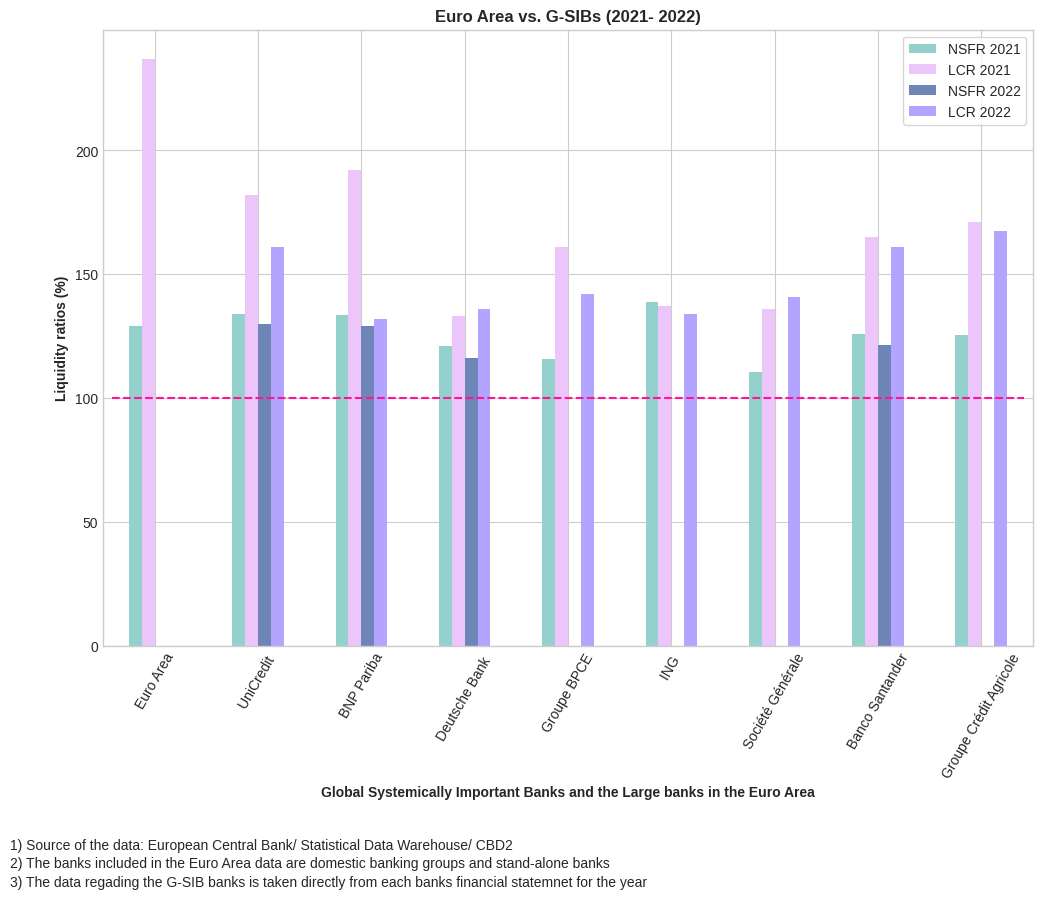

In [ ]:
%matplotlib inline
rcParams['figure.figsize']=12,8

plt.style.use('seaborn-whitegrid')
pl=gsib_df.plot(kind='bar', x='Bank', rot = 60, color = ['#95D1CC', "#ECC5FB", '#6E85B7', "#B2A4FF"])
plt.ylabel("Liquidity ratios (%)",fontsize=10, fontweight = 'bold')
plt.xlabel("Global Systemically Important Banks and the Large banks in the Euro Area",fontsize=10, fontweight = 'bold')
pl.text(-0.1, -0.33, '1) Source of the data: European Central Bank/ Statistical Data Warehouse/ CBD2', transform = pl.transAxes)
pl.text(-0.1, -0.36, '2) The banks included in the Euro Area data are domestic banking groups and stand-alone banks', transform = pl.transAxes)
pl.text(-0.1, -0.39, '3) The data regading the G-SIB banks is taken directly from each banks financial statemnet for the year', transform = pl.transAxes)
pl.set_title('Euro Area vs. G-SIBs (2021- 2022)', fontweight = 'bold', fontsize = 12)
plt.legend(frameon = True, loc = 'upper right')
plt.axhline(y = 100, xmin = 0.01, xmax = 0.99, color = "deeppink", linewidth = 1.5, linestyle = 'dashed')